# `Business case: Delhivery`

# About Delhivery

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

## Column Profiling:

data - tells whether the data is testing or training data

trip_creation_time – Timestamp of trip creation

route_schedule_uuid – Unique Id for a particular route schedule

route_type – Transportation type

FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way

Carting: Handling system consisting of small vehicles (carts)

trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)

source_center - Source ID of trip origin

source_name - Source Name of trip origin

destination_cente – Destination ID

destination_name – Destination Name

od_start_time – Trip start time

od_end_time – Trip end time

start_scan_to_end_scan – Time taken to deliver from source to destination

is_cutoff – Unknown field

cutoff_factor – Unknown field

cutoff_timestamp – Unknown field

actual_distance_to_destination – Distance in Kms between source and destination warehouse

actual_time – Actual time taken to complete the delivery (Cumulative)

osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)

osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)

factor – Unknown field

segment_actual_time – This is a segment time. Time taken by the subset of the package delivery

segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery

segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery

segment_factor – Unknown field

In [1]:
import pandas as pd
import numpy as np 
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np 
from numpy.random import seed
from numpy.random import randint
from numpy import mean
import datetime as dt 
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")


In [2]:
df= pd.read_csv("delhivery.csv")
df.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [3]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [4]:
df.shape

(144867, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

The dataset(before transformation) has about 12 columns of objects, 10 columns of float values, 1 column of integers and lastly one column consisitng of boolean values.

In [6]:
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


*__Observations:__*

- Clearly, integer & floating value columns have no null values.

- All the columns here have large values of outliers.

In [7]:
df.describe(include='object')

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,cutoff_timestamp
count,144867,144867,144867,144867,144867,144867,144574,144867,144606,144867,144867,144867
unique,2,14817,1504,2,14817,1508,1498,1481,1468,26369,26369,93180
top,training,2018-09-28 05:23:15.359220,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,2018-09-24 09:59:15.691618,2018-09-24 05:19:20
freq,104858,101,1812,99660,101,23347,23347,15192,15192,81,81,40


In [8]:
for col in df:
    print(f'Number of unique values in the {col} column:',df[col].nunique(),'.')

Number of unique values in the data column: 2 .
Number of unique values in the trip_creation_time column: 14817 .
Number of unique values in the route_schedule_uuid column: 1504 .
Number of unique values in the route_type column: 2 .
Number of unique values in the trip_uuid column: 14817 .
Number of unique values in the source_center column: 1508 .
Number of unique values in the source_name column: 1498 .
Number of unique values in the destination_center column: 1481 .
Number of unique values in the destination_name column: 1468 .
Number of unique values in the od_start_time column: 26369 .
Number of unique values in the od_end_time column: 26369 .
Number of unique values in the start_scan_to_end_scan column: 1915 .
Number of unique values in the is_cutoff column: 2 .
Number of unique values in the cutoff_factor column: 501 .
Number of unique values in the cutoff_timestamp column: 93180 .
Number of unique values in the actual_distance_to_destination column: 144515 .
Number of unique va

*__Observations__*:

    - Here we notice the columns data,route_type and is_cutoff consists of catagorical information where is_cutoff contains boolean values.

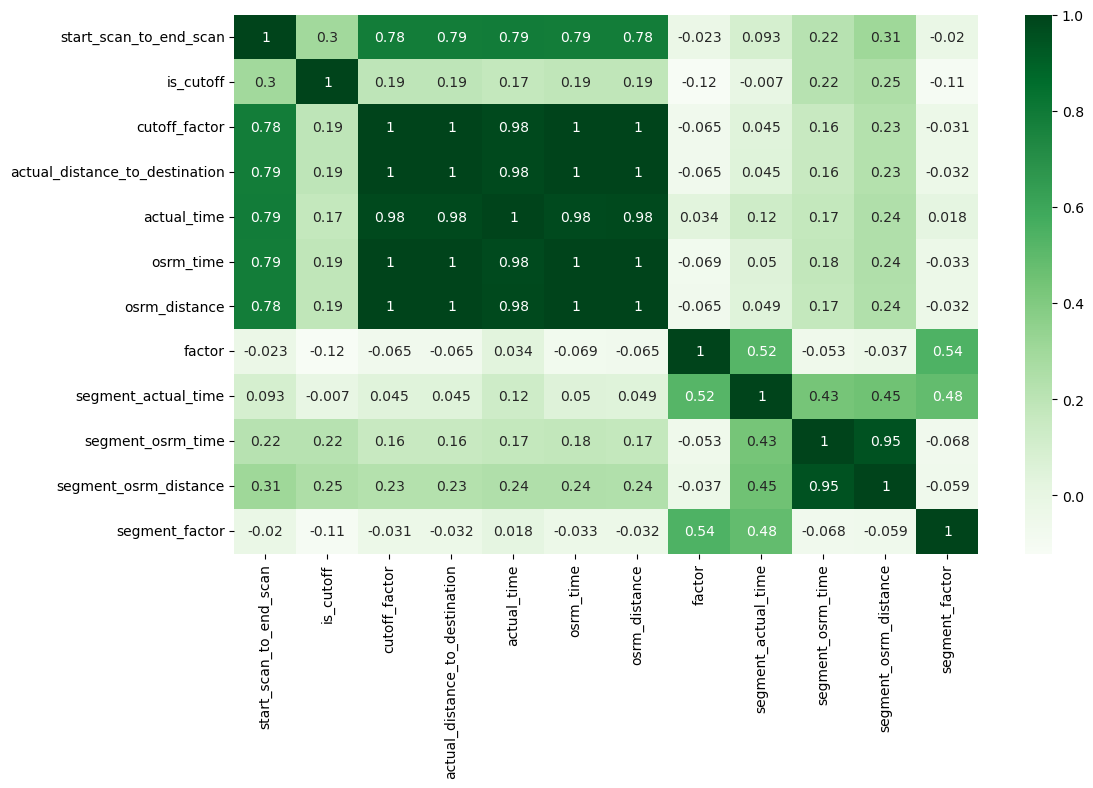

In [9]:
plt.figure(figsize=(12, 7))
df_cor = df.corr()
sns.heatmap(df_cor,annot=True, cmap='Greens')
plt.show()

# `DATA TRANSFORMATION`

In [10]:
# converting columns' datatypes as category
df['data'] = df['data'].astype('category')

df['route_type'] = df['route_type'].astype('category')


In [11]:
df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [12]:
df['source_name'].fillna('Missing',inplace=True)
df['destination_name'].fillna('Missing',inplace=True)

In [13]:
# checking for duplicate values

In [14]:
print('The number of duplicated values in the dataset are ',len(df[df.duplicated()]),'.')

The number of duplicated values in the dataset are  0 .


In [15]:
df['source_city'] = df["source_name"].str.extract(r'([^_]+)')
# source city
df['source_place'] = df["source_name"].str.split("_", n = 2, expand = True)[1]
# source place
df['source_code'] = (df["source_name"].str.split("_",n=2,expand = True)[2]).str.split(" ",n = 1, expand = True)[0]
# source code 
df['source_state'] = df["source_name"].str.extract(r'.*\((.*)\).*')
#  source state
df['destination_city']= df["destination_name"].str.extract(r'([^_]+)')
# destination city
df['destination_place'] = df["destination_name"].str.split("_", n = 2, expand = True)[1]
# destination place
df['destination_code'] = (df["destination_name"].str.split("_",n=2,expand = True)[2]).str.split(" ",n = 1, expand = True)[0]
# destination code 
df['destination_state'] = df["destination_name"].str.extract(r'.*\((.*)\).*')
# destination state

In [16]:
pd.set_option('display.max_columns', None)
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_city,source_place,source_code,source_state,destination_city,destination_place,destination_code,destination_state
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,Anand,VUNagar,DC,Gujarat,Khambhat,MotvdDPP,D,Gujarat
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,Anand,VUNagar,DC,Gujarat,Khambhat,MotvdDPP,D,Gujarat
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,Anand,VUNagar,DC,Gujarat,Khambhat,MotvdDPP,D,Gujarat
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,Anand,VUNagar,DC,Gujarat,Khambhat,MotvdDPP,D,Gujarat
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,Anand,VUNagar,DC,Gujarat,Khambhat,MotvdDPP,D,Gujarat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,45,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000,Sonipat,Kundli,H,Haryana,Gurgaon,Bilaspur,HB,Haryana
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,54,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095,Sonipat,Kundli,H,Haryana,Gurgaon,Bilaspur,HB,Haryana
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,63,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235,Sonipat,Kundli,H,Haryana,Gurgaon,Bilaspur,HB,Haryana
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip

In [17]:
df['trip_creation_time'] = df['trip_creation_time'].astype('datetime64')
df['od_end_time'] = df['od_end_time'].astype('datetime64')
df['od_start_time'] = df['od_start_time'].astype('datetime64')
# creating a new column to save the time taken from order taken to order received
df['od_duration_in_hrs'] = (df['od_end_time'] - df['od_start_time']).dt.total_seconds() / 3600
# converting minutes into hours
df['start_scan_to_end_scan'] = df['start_scan_to_end_scan']/60
# Trip_creation_time: Extract features like month, year and day.
df['trip_creation_month'] = df['trip_creation_time'].dt.month_name()
df['trip_creation_year'] = df['trip_creation_time'].dt.year
# df['trip_creation_year'] = df['trip_creation_time'].dt.day

In [18]:
# dropping unknown columns from the dataset
df.drop(columns=['is_cutoff','cutoff_factor','cutoff_timestamp','factor','segment_factor'],axis=1,inplace=True)

In [19]:
print('Number of columns in the dataset after creating new columns and dropping some columns: ',df.shape[1])

Number of columns in the dataset after creating new columns and dropping some columns:  30


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  category      
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  category      
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144867 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144867 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
start_scan_to_end_scan,144867.0,16.021050,17.283546,0.333333,2.683333,7.483333,27.233333,131.633333
actual_distance_to_destination,144867.0,234.073372,344.990009,9.000045,23.355874,66.126571,286.708875,1927.447705
actual_time,144867.0,416.927527,598.103621,9.000000,51.000000,132.000000,513.000000,4532.000000
osrm_time,144867.0,213.868272,308.011085,6.000000,27.000000,64.000000,257.000000,1686.000000
osrm_distance,144867.0,284.771297,421.119294,9.008200,29.914700,78.525800,343.193250,2326.199100
segment_actual_time,144867.0,36.196111,53.571158,-244.000000,20.000000,29.000000,40.000000,3051.000000
segment_osrm_time,144867.0,18.507548,14.775960,0.000000,11.000000,17.000000,22.000000,1611.000000
segment_osrm_distance,144867.0,22.829020,17.860660,0.000000,12.070100,23.513000,27.813250,2191.403700
od_duration_in_hrs,144867.0,16.029317,17.283544,0.345047,2.691688,7.487276,27.249169,131.642533
trip_creation_year,144867.0,2018.000000,0.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000


In [22]:
df.describe(include='object')

,route_schedule_uuid,trip_uuid,source_center,source_name,destination_center,destination_name,source_city,source_place,source_code,source_state,destination_city,destination_place,destination_code,destination_state,trip_creation_month
count,144867,144867,144867,144867,144867,144867,144867,142467,129924,144574,144867,142165,129038,144606,144867
unique,1504,14817,1508,1499,1481,1469,1263,1178,48,31,1259,1154,48,32,2
top,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),Gurgaon,Bilaspur,HB,Haryana,Gurgaon,Bilaspur,H,Karnataka,September
freq,1812,101,23347,23347,15192,15192,23665,23464,41177,27499,15393,15363,34584,21065,127349


In [23]:
df.nunique()

data                                   2
trip_creation_time                 14817
route_schedule_uuid                 1504
route_type                             2
trip_uuid                          14817
source_center                       1508
source_name                         1499
destination_center                  1481
destination_name                    1469
od_start_time                      26369
od_end_time                        26369
start_scan_to_end_scan              1915
actual_distance_to_destination    144515
actual_time                         3182
osrm_time                           1531
osrm_distance                     138046
segment_actual_time                  747
segment_osrm_time                    214
segment_osrm_distance             113799
source_city                         1263
source_place                        1178
source_code                           48
source_state                          31
destination_city                    1259
destination_plac

In [24]:
agg_dict_intermediate_dest = {
'data' : 'first',
'trip_creation_time' : 'first',
'route_type' : 'first',
'route_schedule_uuid' : 'first',
'source_center' : 'first',
'source_code' : 'first',
'source_city' : 'first',
'source_state' : 'first',
'source_name' : 'first',
'destination_center' : 'last',
'destination_code' : 'last',
'destination_city' : 'last',
'destination_state' : 'last',
'destination_name' : 'last',
'actual_distance_to_destination' : 'last',
'trip_creation_month':'first',
'trip_creation_year':'first'
}

In [25]:
df1 = df.groupby('trip_uuid').agg(agg_dict_intermediate_dest).reset_index()

In [26]:
df1.shape

(14817, 18)

In [27]:
df_part1 = pd.DataFrame(df.groupby('trip_uuid')['start_scan_to_end_scan'].unique().apply(sum).reset_index())

df_part2 = pd.DataFrame(df.groupby('trip_uuid')['od_duration_in_hrs'].unique().apply(sum).reset_index())

df_part3 =pd.DataFrame(df.groupby(['trip_uuid','od_duration_in_hrs'])['actual_time'].max().reset_index())
df_part3 = pd.DataFrame(df_part3.groupby('trip_uuid')['actual_time'].sum().reset_index())

df_part4 =pd.DataFrame(df.groupby(['trip_uuid','od_duration_in_hrs'])['osrm_time'].max().reset_index())
df_part4 = pd.DataFrame(df_part4.groupby('trip_uuid')['osrm_time'].sum().reset_index())

# actual time and segment actual time
seg_time = pd.DataFrame(df.groupby(['trip_uuid','od_duration_in_hrs'])['segment_actual_time'].sum().reset_index())
df_part5 = pd.DataFrame(seg_time.groupby('trip_uuid')['segment_actual_time'].sum().reset_index())

# osrm distance and segment osrm distance
om_dist =pd.DataFrame(df.groupby(['trip_uuid','od_duration_in_hrs'])['osrm_distance'].max().reset_index())
df_part6= pd.DataFrame(om_dist.groupby('trip_uuid')['osrm_distance'].sum().reset_index())
df_part7 = pd.DataFrame(df.groupby('trip_uuid')['segment_osrm_distance'].sum().reset_index())

# osrm time ans segment osrm time
df_part8 = pd.DataFrame(df.groupby('trip_uuid')['segment_osrm_time'].sum().reset_index())

In [28]:
print(df_part1.shape)
print(df_part2.shape)
print(df_part3.shape)
print(df_part4.shape)
print(df_part5.shape)
print(df_part6.shape)
print(df_part7.shape)
print(df_part8.shape)
print(df1.shape)

(14817, 2)
(14817, 2)
(14817, 2)
(14817, 2)
(14817, 2)
(14817, 2)
(14817, 2)
(14817, 2)
(14817, 18)


In [29]:
df1 = df1.merge(df_part1,on='trip_uuid')
df1 = df1.merge(df_part2,on='trip_uuid')
df1 = df1.merge(df_part3,on='trip_uuid')
df1 = df1.merge(df_part4,on='trip_uuid')
df1 = df1.merge(df_part5,on='trip_uuid')
df1 = df1.merge(df_part6,on='trip_uuid')
df1 = df1.merge(df_part7,on='trip_uuid')
df1 = df1.merge(df_part8,on='trip_uuid')

In [30]:
df1.shape

(14817, 26)

In [31]:
df = df1.copy(deep=True)

In [32]:
df['week'] = df['trip_creation_time'].dt.day_name()
df['hour'] = df['trip_creation_time'].dt.hour
df['date'] = df['trip_creation_time'].dt.date

####  ------------------------------------------------------------Data Transformation Ends-----------------------------------------------------------------------

## `DATA VISUALIZATION`

In [33]:
pd.set_option('display.max_columns', None)
df.head()

,trip_uuid,data,trip_creation_time,route_type,route_schedule_uuid,source_center,source_code,source_city,source_state,source_name,destination_center,destination_code,destination_city,destination_state,destination_name,actual_distance_to_destination,trip_creation_month,trip_creation_year,start_scan_to_end_scan,od_duration_in_hrs,actual_time,osrm_time,segment_actual_time,osrm_distance,segment_osrm_distance,segment_osrm_time,week,hour,date
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,FTL,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,IND462022AAA,H,Bhopal,Madhya Pradesh,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,HB,Gurgaon,Haryana,Gurgaon_Bilaspur_HB (Haryana),383.759164,September,2018,37.650000,37.668497,1562.0,743.0,1548.0,991.3523,1320.4733,1008.0,Wednesday,0,2018-09-12
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,Carting,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,IND572101AAA,I,Tumkur,Karnataka,Tumkur_Veersagr_I (Karnataka),IND562101AAA,D,Chikblapur,Karnataka,Chikblapur_ShntiSgr_D (Karnataka),24.644021,September,2018,3.000000,3.026865,143.0,68.0,141.0,85.1110,84.1894,65.0,Wednesday,0,2018-09-12
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,FTL,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,IND562132AAA,H,Bangalore,Karnataka,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,H,Chandigarh,Punjab,Chandigarh_Mehmdpur_H (Punjab),237.439610,September,2018,65.550000,65.572709,3347.0,1741.0,3308.0,2372.0852,2545.2678,1941.0,Wednesday,0,2018-09-12
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,Carting,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,IND400072AAB,None,Mumbai Hub (Maharashtra),Maharashtra,Mumbai Hub (Maharashtra),IND401104AAA,IP,Mumbai,Maharashtra,Mumbai_MiraRd_IP (Maharashtra),17.175274,September,2018,1.666667,1.674916,59.0,15.0,59.0,19.6800,19.8766,16.0,Wednesday,0,2018-09-12
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,FTL,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,IND583101AAA,D,Bellary,Karnataka,Bellary_Dc (Karnataka),IND583101AAA,D,Bellary,Karnataka,Bellary_Dc (Karnataka),41.317614,September,2018,11.950000,11.972484,341.0,117.0,340.0,146.7918,146.7919,115.0,Wednesday,0,2018-09-12


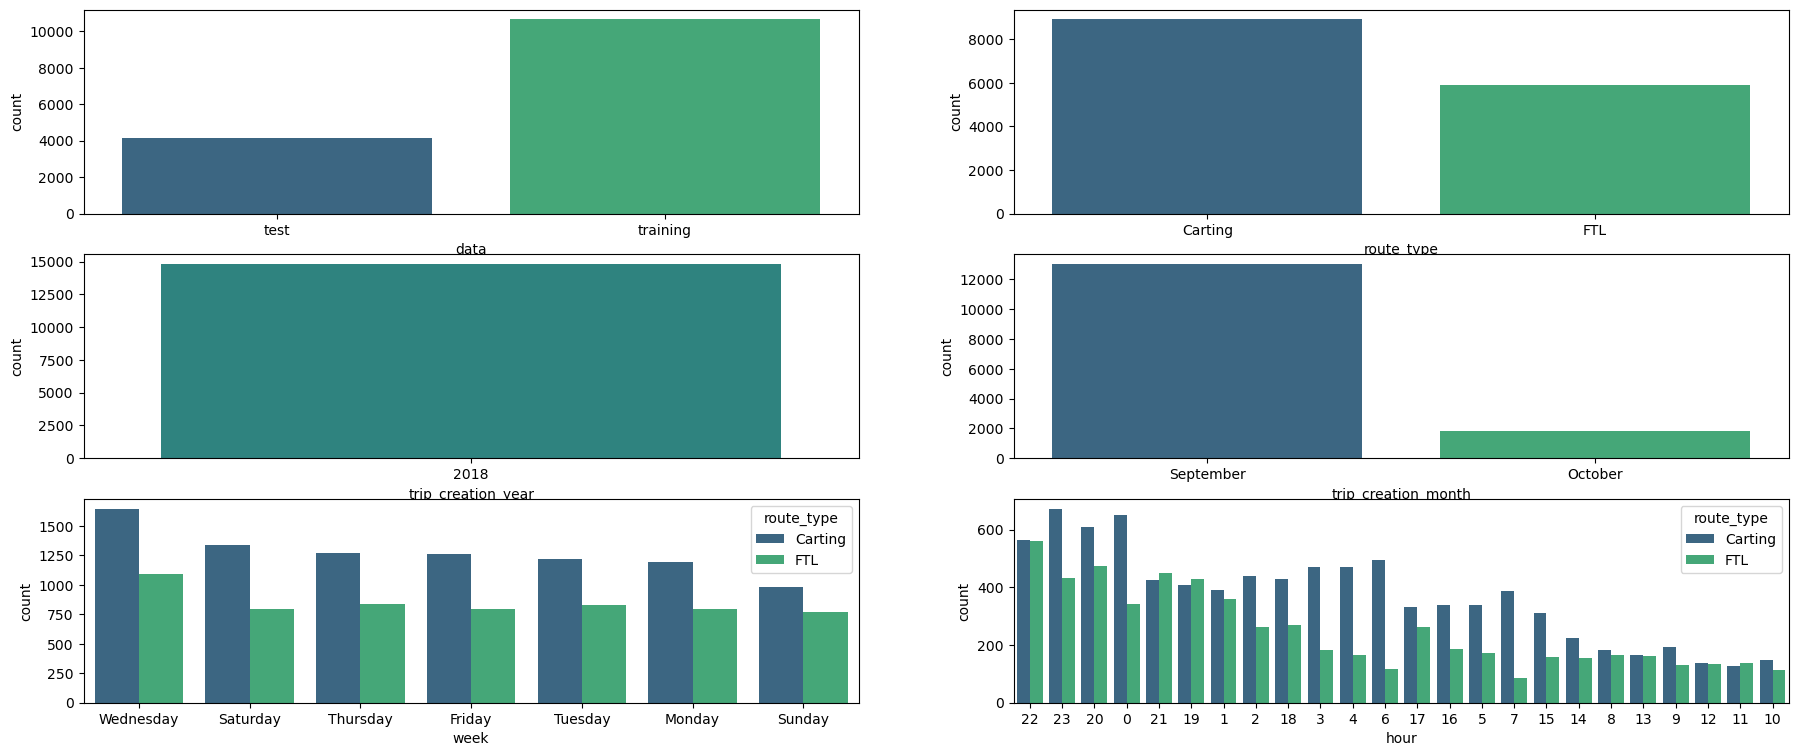

In [34]:
plt.figure(figsize=(22,9))
plt.subplot(3,2,1)
sns.countplot(x=df.data,palette='viridis')

plt.subplot(3,2,2)
sns.countplot(x=df.route_type,palette='viridis')

plt.subplot(3,2,3)
sns.countplot(x=df.trip_creation_year,palette='viridis')

plt.subplot(3,2,4)
sns.countplot(x=df.trip_creation_month,palette='viridis')

plt.subplot(3,2,5)
sns.countplot(x=df.week,palette='viridis',order=df.week.value_counts().index,hue=df.route_type)

plt.subplot(3,2,6)
sns.countplot(x=df.hour,palette='viridis',order=df.hour.value_counts().index,hue=df.route_type)
plt.show()

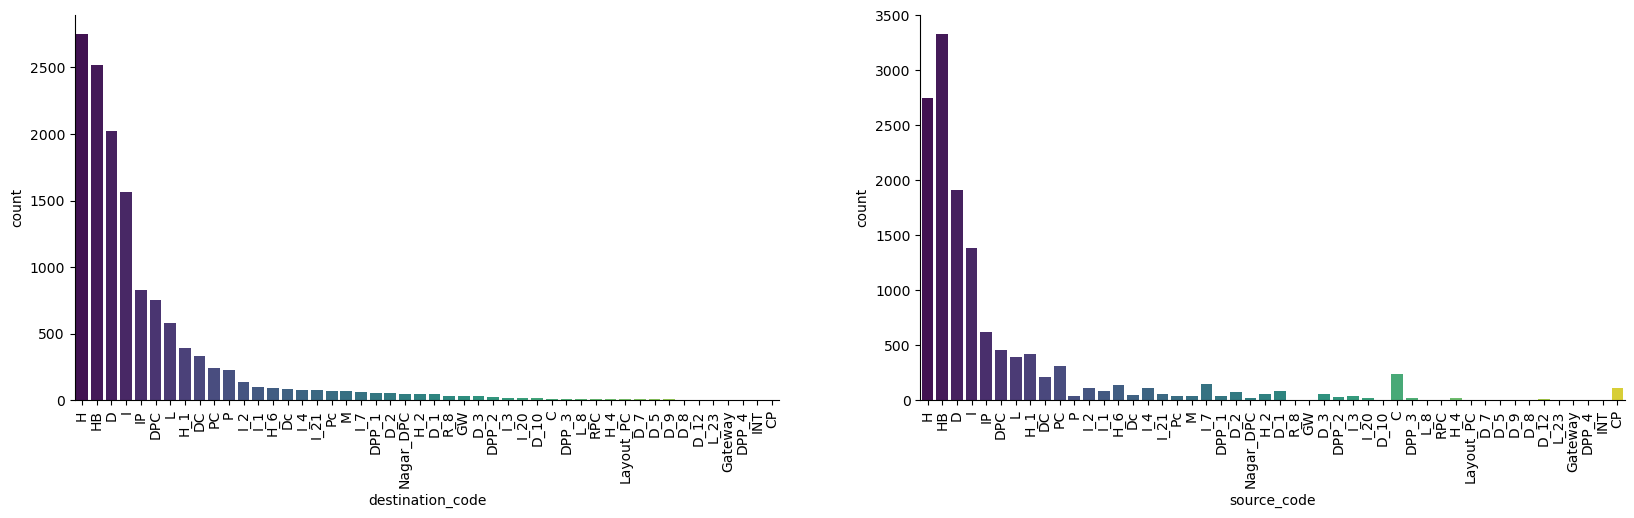

In [35]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x=df.destination_code,palette='viridis',order = df['destination_code'].value_counts().index)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(x=df.source_code,palette='viridis',order = df['destination_code'].value_counts().index)
plt.xticks(rotation=90)
sns.despine()
plt.show()

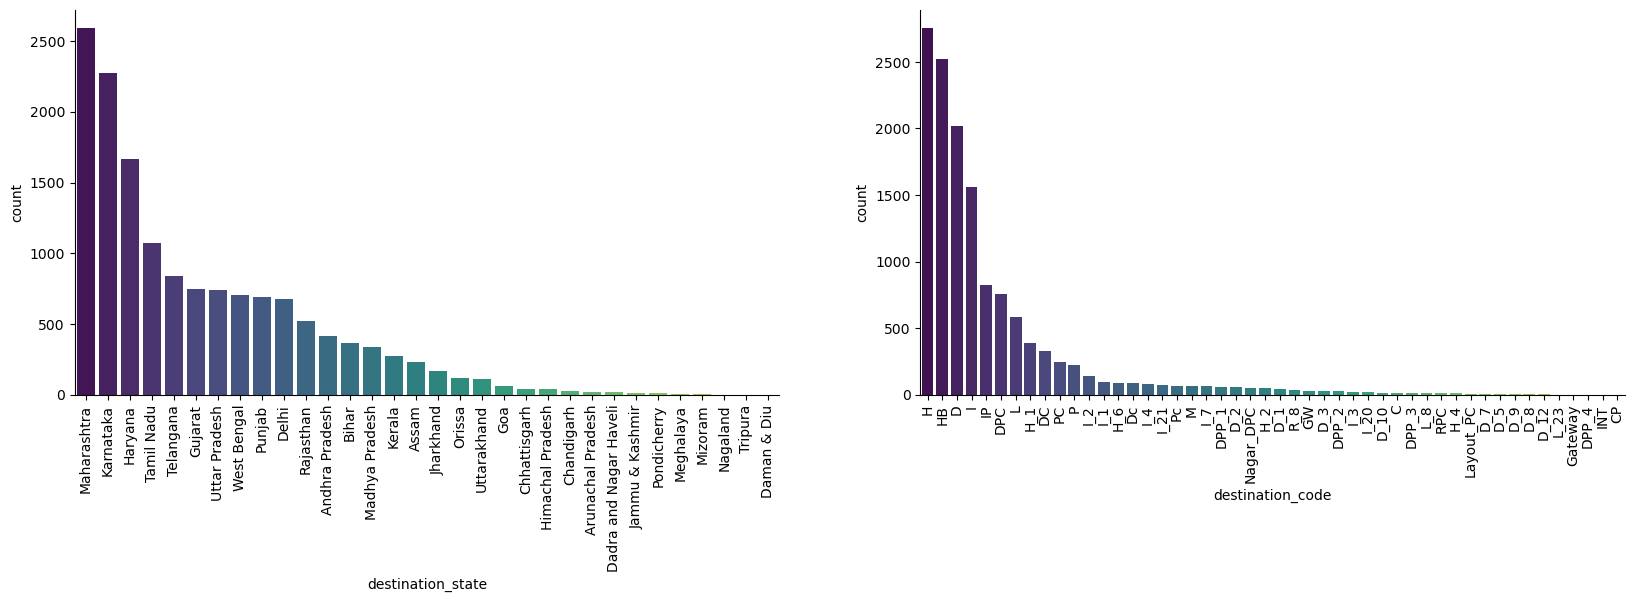

In [36]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x=df.destination_state,palette='viridis',order = df['destination_state'].value_counts().index)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(x=df.destination_code,palette='viridis',order = df['destination_code'].value_counts().index)
plt.xticks(rotation=90)
sns.despine()
plt.show()

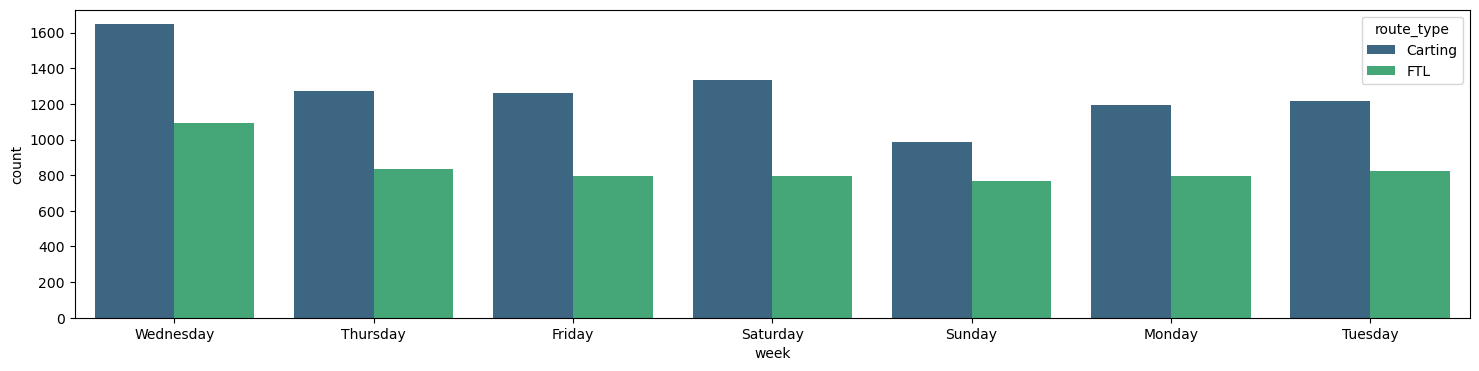

In [37]:
plt.figure(figsize=(18,4))
sns.countplot(x=df.week,hue=df.route_type,palette='viridis')
plt.show()

In [38]:
number_df = df.select_dtypes('float64')
number_df.shape

(14817, 9)

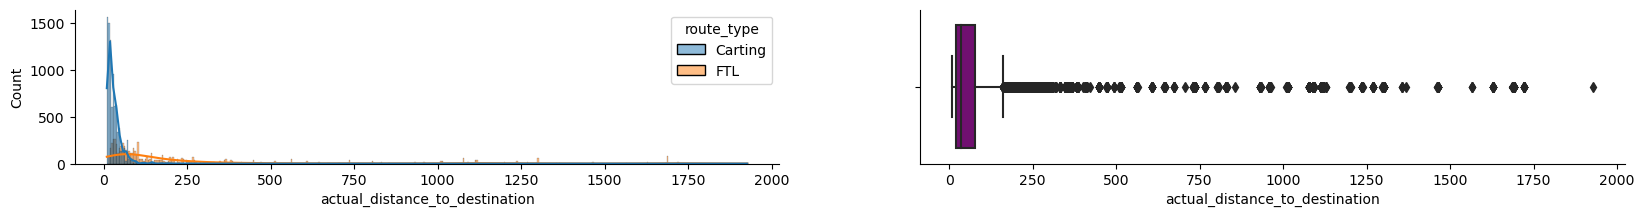

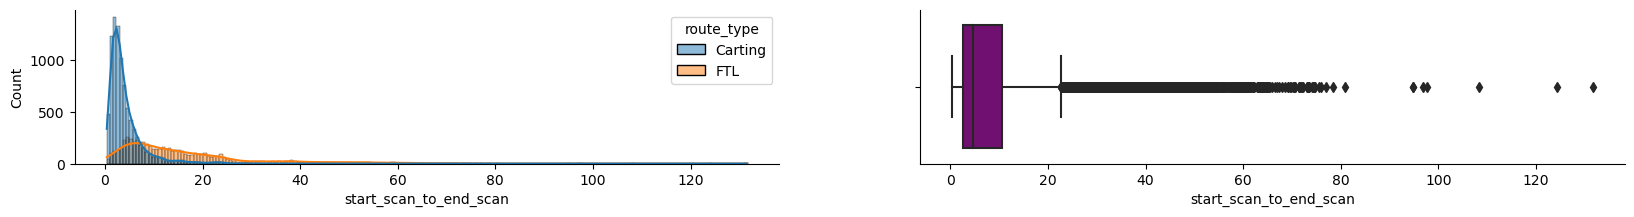

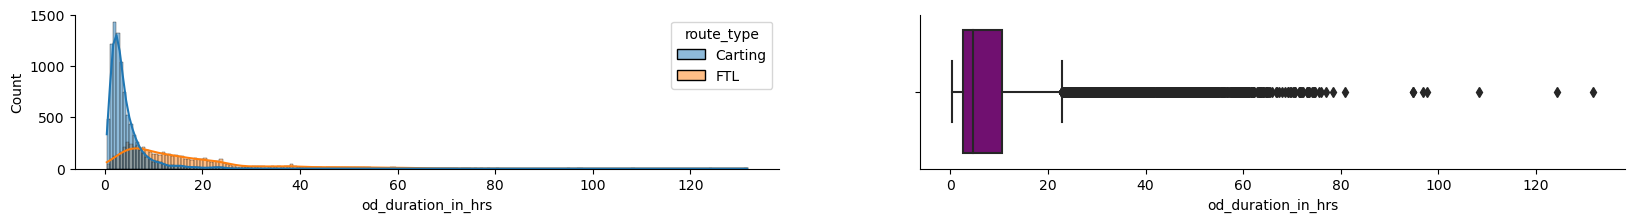

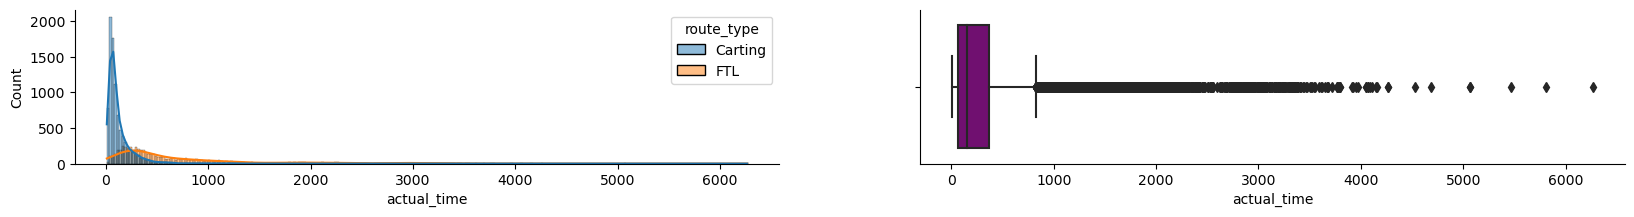

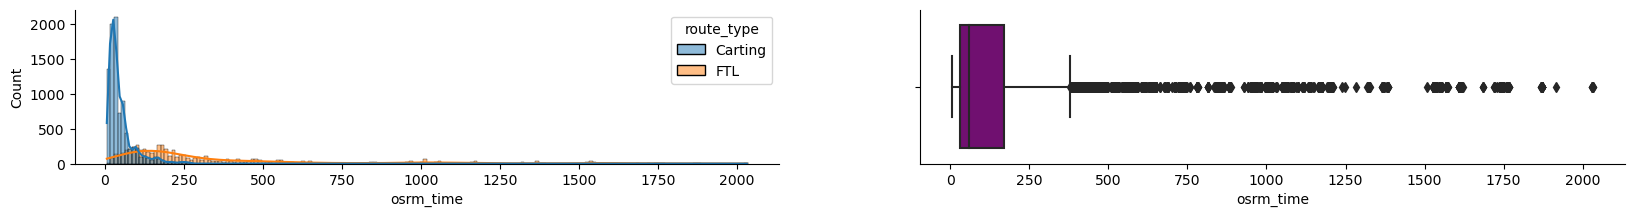

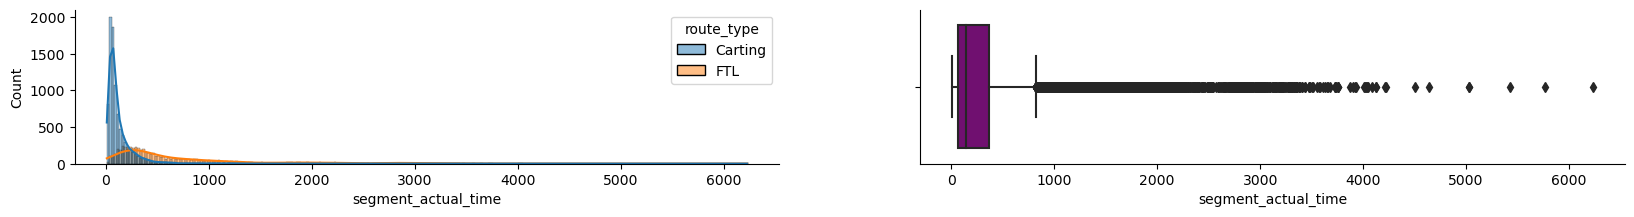

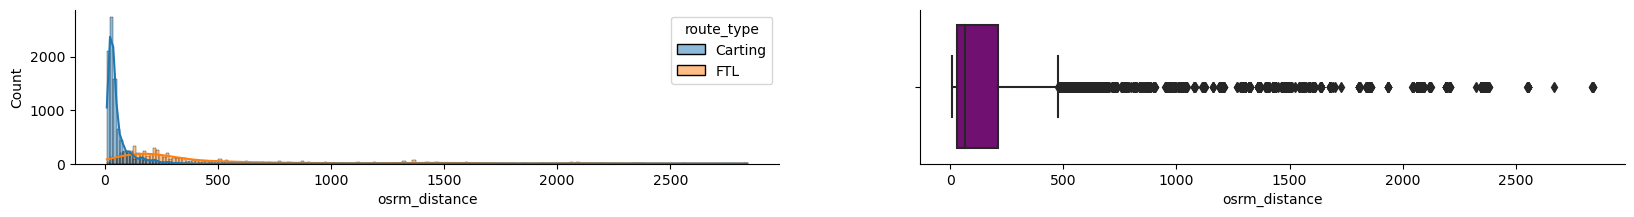

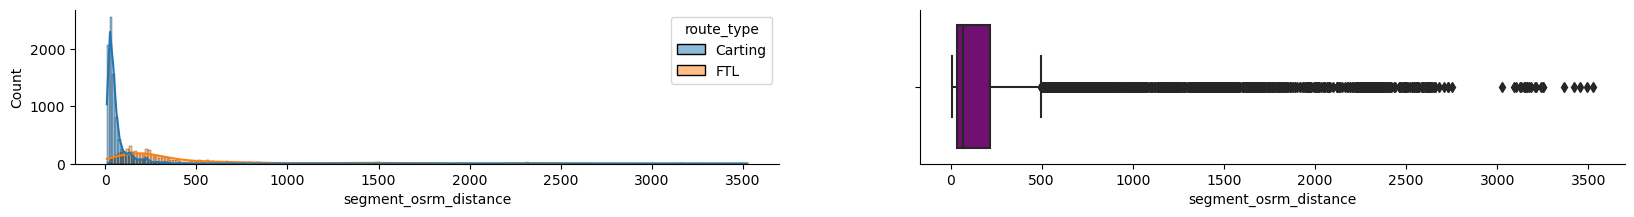

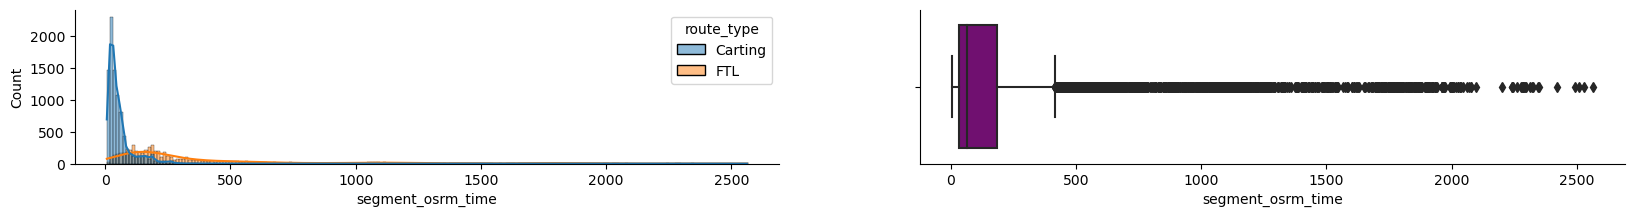

In [39]:
for i in number_df.columns:
    plt.figure(figsize=(20,2))
    plt.subplot(1,2,1)
    sns.histplot(x=number_df[i],kde=True,hue=df.route_type)
    plt.subplot(1,2,2)
    sns.boxplot(x=number_df[i],color='purple')
    sns.despine()
    plt.show()

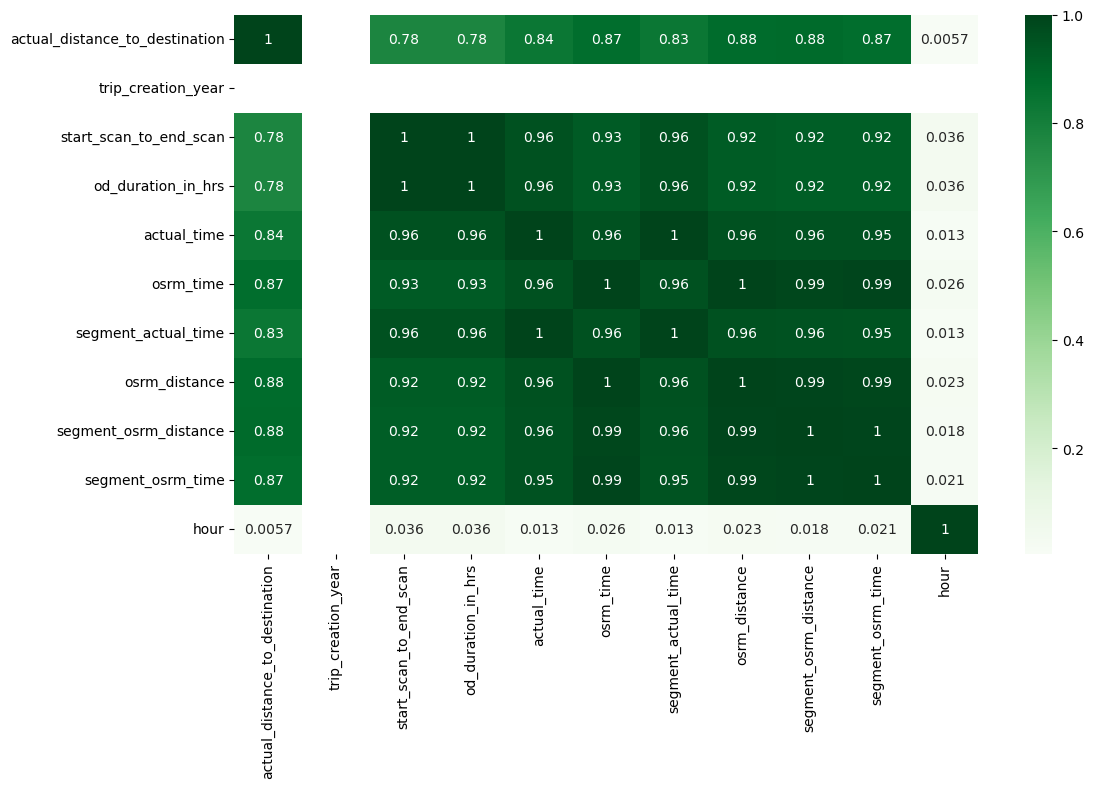

In [40]:
plt.figure(figsize=(12, 7))
df_cor = df.corr()
sns.heatmap(df_cor,annot=True, cmap='Greens')
plt.show()

`Observations:-`
- start_scan_to_end_scan shares a less strong correlation with many aspects as time taken for the delivery from source to destination will impact the actual timing and distance of that delivery.
- actual_time shares a strong correlation with osrm_time which means actual_time is approximately as close to time generated in osrm_time.
- segment_osrm_time and segment_osrm_distance shares almost a perfect correlation as time is perfectly correlated to distance.
- od_duration(feature extracted from or_start to or_end) has a perfect correlation with start_scan_to_end_scan which means estimation made on the delivery was exact.

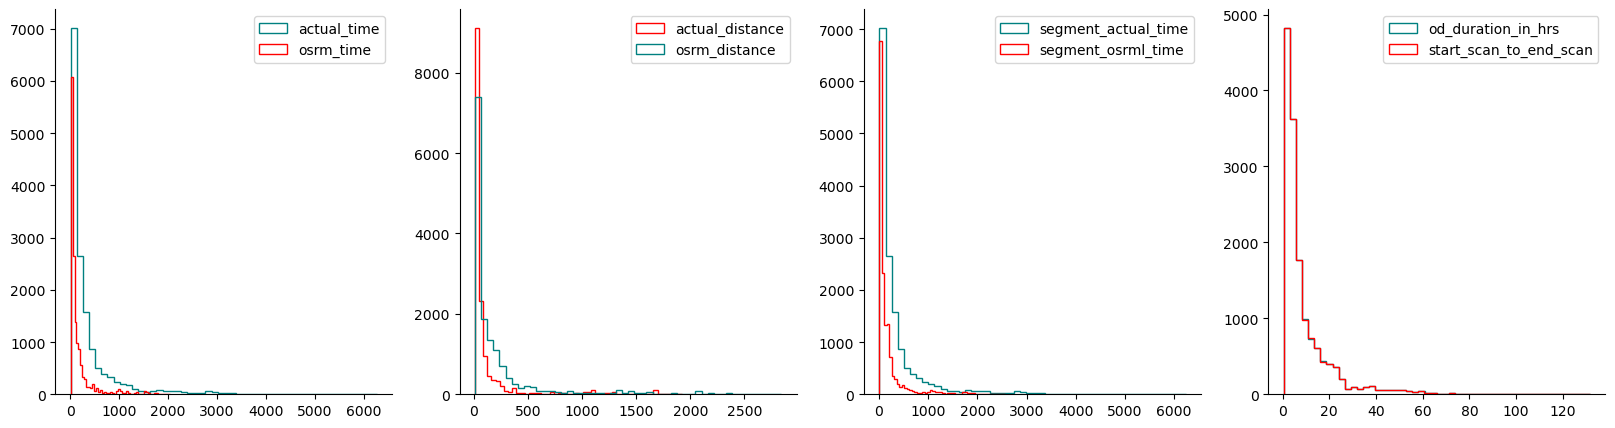

In [41]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.hist(df.actual_time, bins=50,histtype='step',color='teal')
plt.hist(df.osrm_time, bins=50,histtype='step',color='red')
plt.legend(['actual_time','osrm_time'])
plt.subplot(1,4,2)
plt.hist(df.actual_distance_to_destination, bins=50,histtype='step',color='red')
plt.hist(df.osrm_distance, bins=50,histtype='step',color='teal')
plt.legend(['actual_distance','osrm_distance'])
plt.subplot(1,4,3)
plt.hist(df.segment_actual_time, bins=50,histtype='step',color='teal')
plt.hist(df.segment_osrm_time, bins=50,histtype='step',color='red')
plt.legend(['segment_actual_time','segment_osrml_time'])
plt.subplot(1,4,4)
plt.hist(df.od_duration_in_hrs, bins=50,histtype='step',color='teal')
plt.hist(df.start_scan_to_end_scan, bins=50,histtype='step',color='red')
plt.legend(['od_duration_in_hrs','start_scan_to_end_scan'])
sns.despine()
plt.show()

`Observations:-`
- it can be observed that start_scan_to_end_scan has completely shadowed od_duration as they share a perfect correlation.
- it can be noticed that actual_distance and osrm_distance are almost perfectly correlated.

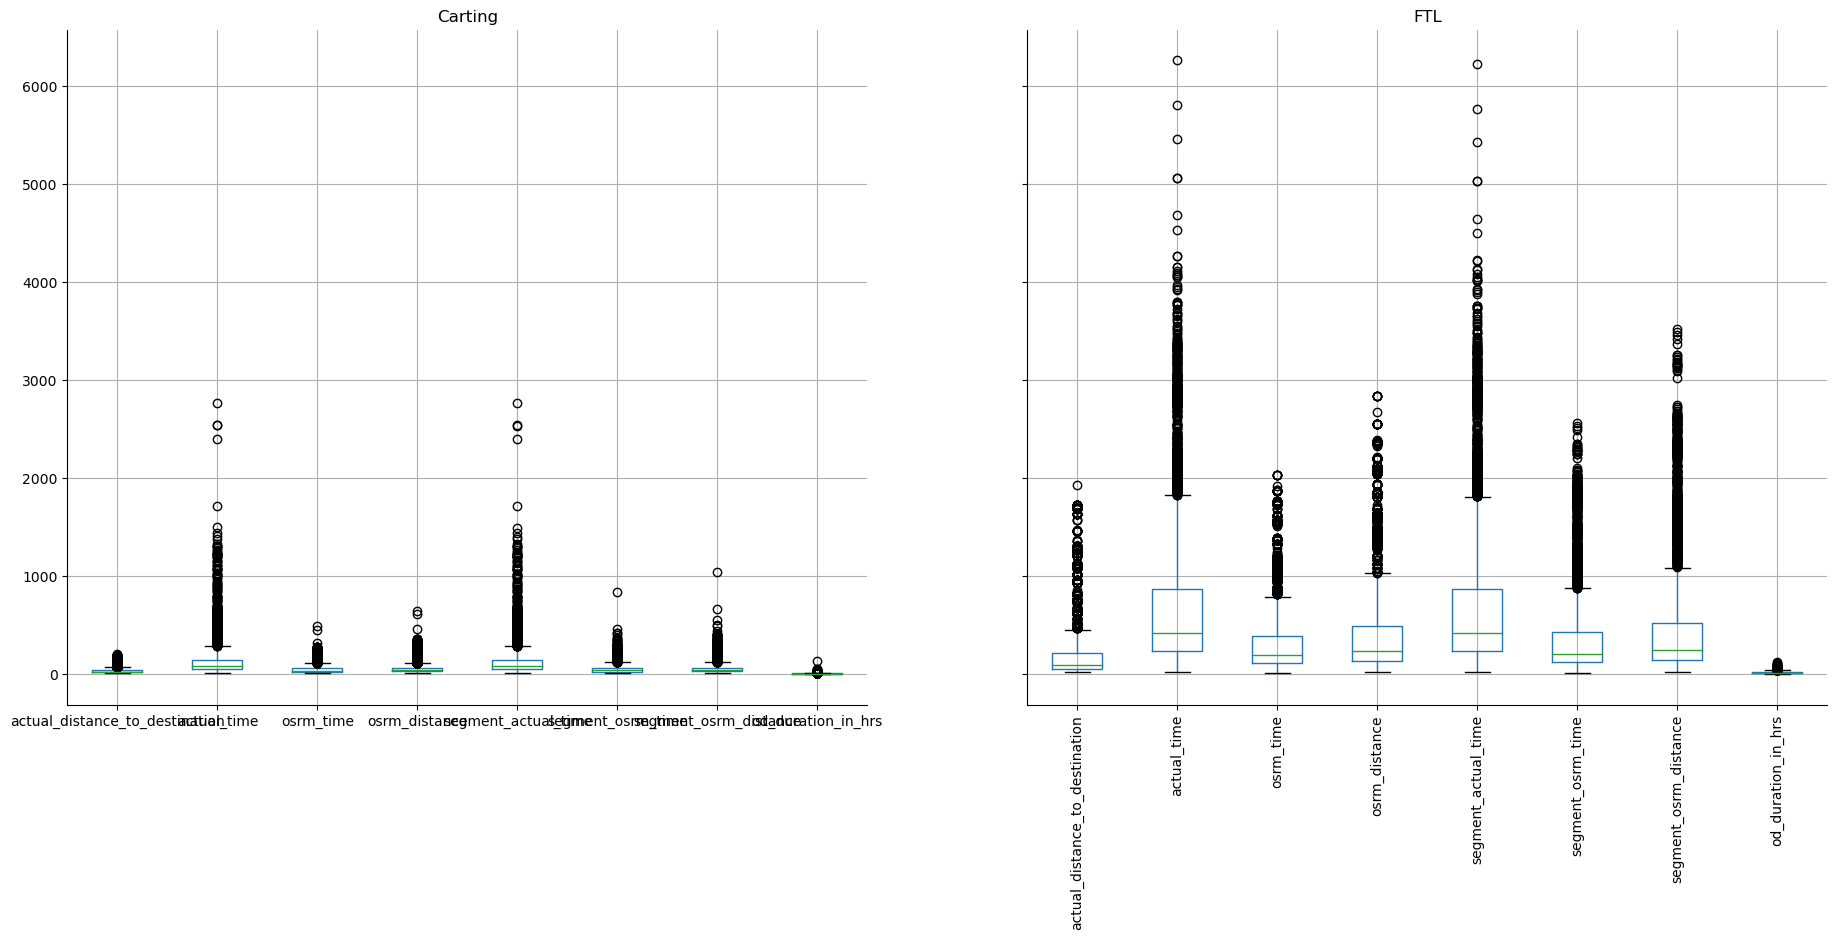

In [42]:
# plt.figure(figsize=(22,7))
df.groupby('route_type').boxplot(column=['actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'od_duration_in_hrs'],figsize=(22,9))
plt.xticks(rotation=90)
sns.despine()
plt.show()

`Observations:-`
- it can be clearly seen that delivery through FTL routing far better that Carting in many aspects.
- although FTL routing performs similiar to Carting in od_duration_in_hrs.

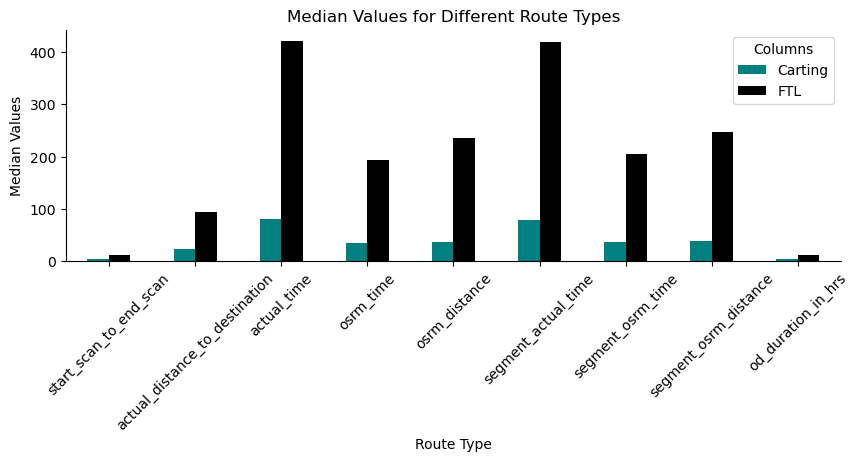

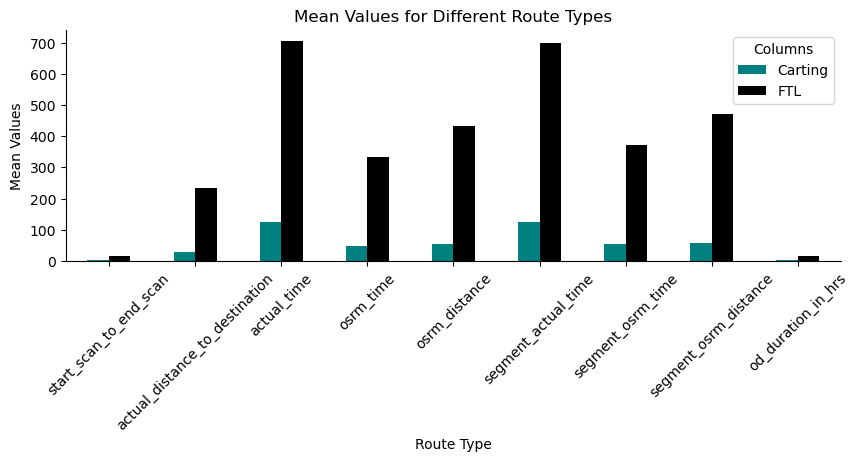

In [43]:
route_mean = pd.DataFrame(df.groupby('route_type')['start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'od_duration_in_hrs'].mean())

route_median = pd.DataFrame(df.groupby('route_type')['start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'od_duration_in_hrs'].median())

route_median_transposed = route_median.T
route_median_transposed.plot(kind='bar',color=['teal','black'],figsize=(10,3))
plt.title('Median Values for Different Route Types')
plt.xlabel('Route Type')
plt.ylabel('Median Values')
plt.xticks(rotation=45)
plt.legend(title='Columns', bbox_to_anchor=(1, 1))
sns.despine()
plt.show()

route_median_transposed = route_mean.T
route_median_transposed.plot(kind='bar',color=['teal','black'],figsize=(10,3))
plt.title('Mean Values for Different Route Types')
plt.xlabel('Route Type')
plt.ylabel('Mean Values')
plt.xticks(rotation=45)
plt.legend(title='Columns', bbox_to_anchor=(1, 1))
sns.despine()
plt.show()



# `HYPOTHESIS TESTING`

## `Hypothesis 1:`

###  Statement: Compare the difference between Point a. and start_scan_to_end_scan. 

In [44]:
hypo_1= df.start_scan_to_end_scan
hypo_2 = df.od_duration_in_hrs
hypo_1_1_log = np.log(hypo_1)
hypo_1_2_log = np.log(hypo_2)

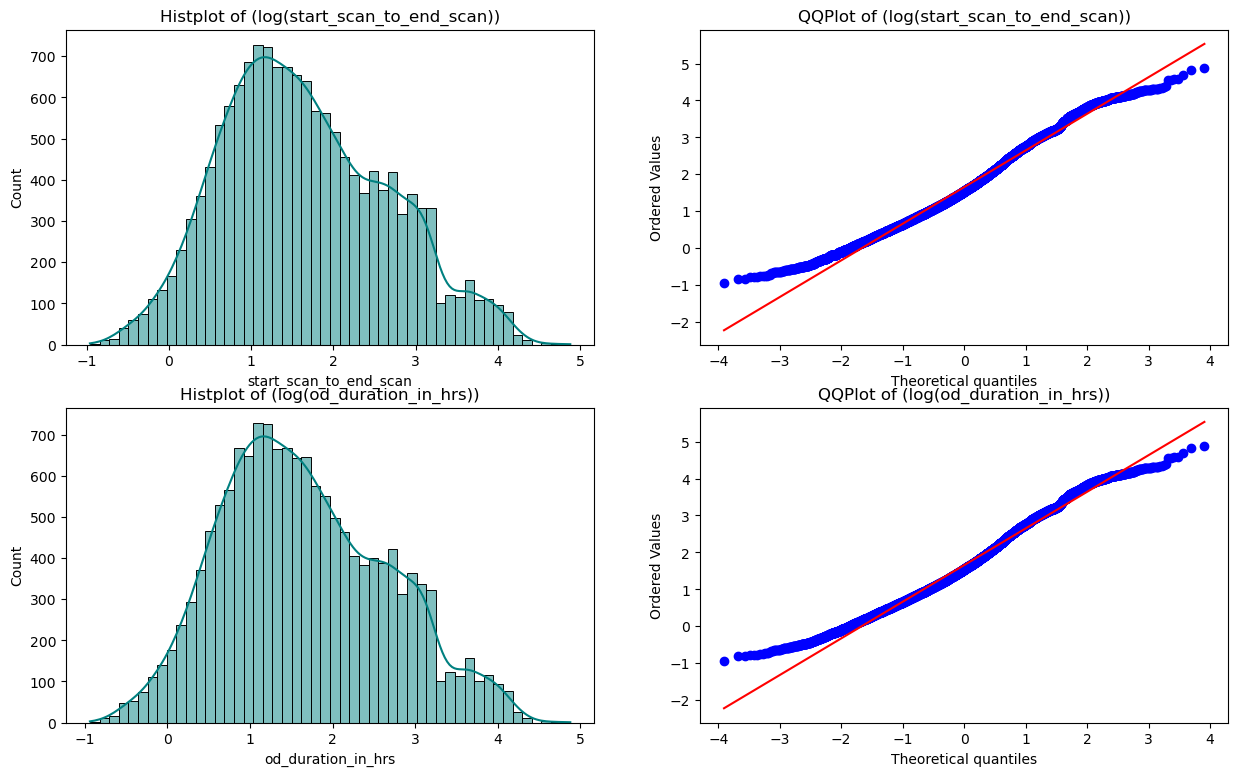

In [45]:
fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(221)
sns.histplot(hypo_1_1_log, bins=50, kde=True,color='teal')
plt.title('Histplot of (log(start_scan_to_end_scan))')

ax = fig.add_subplot(222)
stats.probplot(hypo_1_1_log, dist='norm', plot=plt)
plt.title('QQPlot of (log(start_scan_to_end_scan))')

ax = fig.add_subplot(223)
sns.histplot(hypo_1_2_log, bins=50, kde=True,color='teal')
plt.title('Histplot of (log(od_duration_in_hrs))')

ax = fig.add_subplot(224)
stats.probplot(hypo_1_2_log, dist='norm', plot=plt)
plt.title('QQPlot of (log(od_duration_in_hrs))')
plt.show()

__Step 1: Defining the null and Altenate Hypothesis__

H0: start_scan_to_end_scan and od_duration_in_hrs have the same mean.

H1: start_scan_to_end_scan and od_duration_in_hrs does not have the same mean

__Step 2: Selecting the appropriate test__

T-test is the appropriate test for this hypothesis because the standard deviation of the population of both the column is unknown.

This is a one-tailed test concerning two population means from two independent populations. 

As the population standard deviations are unknown, the two sample independent t-test will be the

appropriate test for this problem.


In [46]:
a = df['start_scan_to_end_scan'].sample(1000)
b = df['od_duration_in_hrs'].sample(10000)
print('The standard deviation of the sample of start_scan_to_end_scan is',a.std(),'.')
print('The standard deviation of the sample of od_duration_in_hrs is',b.std(),'.')

The standard deviation of the sample of start_scan_to_end_scan is 11.051818076088374 .
The standard deviation of the sample of od_duration_in_hrs is 10.977598432828737 .


__Step 3: Defining the significance level__

The significance value, for this hypothesis would be 0.05.

__Step 4: Calculating the p_value__

In [47]:
hypo1 = df.start_scan_to_end_scan
hypo2 = df.od_duration_in_hrs

In [48]:
for i in range(5):
    print(stats.ttest_ind(np.log(hypo1).sample(10000),np.log(hypo2).sample(10000)))
    print()


Ttest_indResult(statistic=-0.3824980507665939, pvalue=0.7020960393533099)

Ttest_indResult(statistic=-0.47106154167542463, pvalue=0.6376019260203912)

Ttest_indResult(statistic=-0.5454871309832088, pvalue=0.5854246130125554)

Ttest_indResult(statistic=-0.3962167790754118, pvalue=0.6919493414702907)

Ttest_indResult(statistic=-1.3362133218621477, pvalue=0.1814947617876685)



__Step 5: Conclussion__

Multiple t-tests have been done, as observed, p_value > the alpha or significance value.

Hence, we fail to reject the null Hypothesis.

## Hypothesis 2
### Statement: Hypothesis Testing on actual_time aggregated value and OSRM time aggregated value 

In [49]:
hypo_3 = df.actual_time
hypo_4 = df.osrm_time
hypo_2_1_log = np.log(hypo_3)
hypo_2_2_log = np.log(hypo_4)

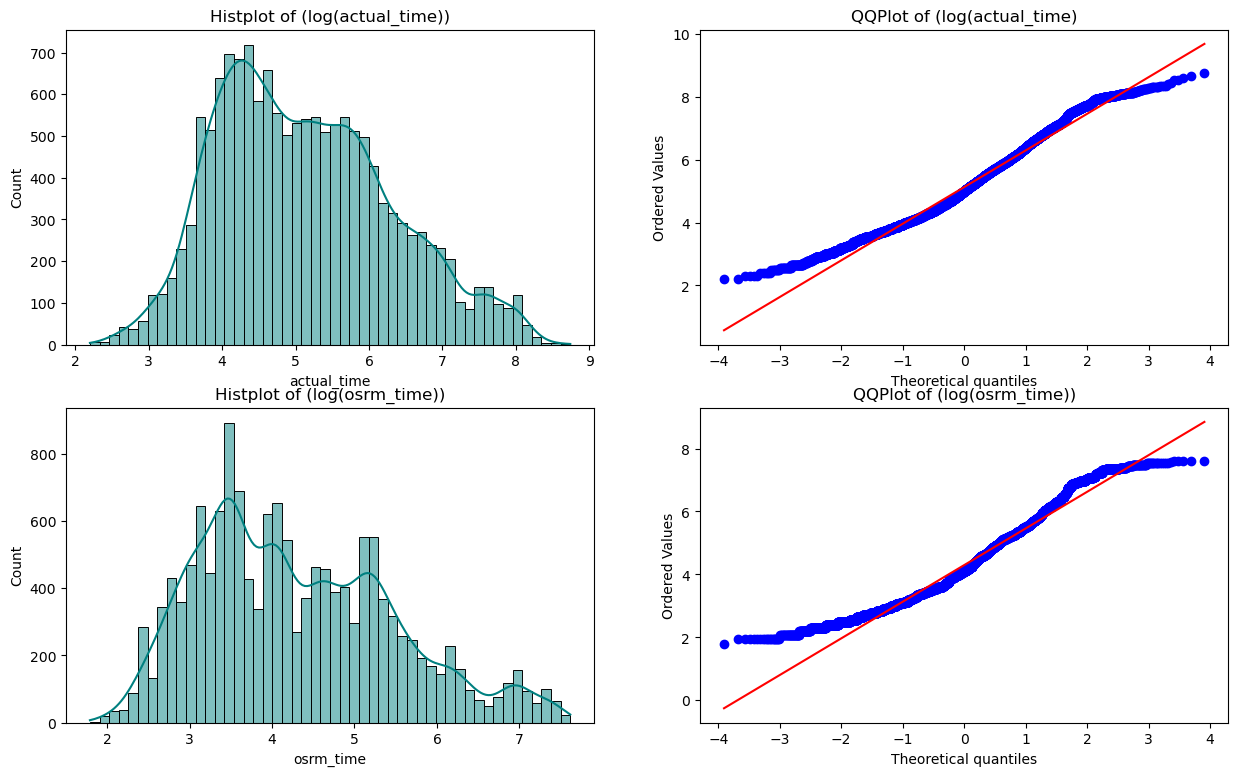

In [50]:
fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(221)
sns.histplot(hypo_2_1_log, bins=50, kde=True,color='teal')
plt.title('Histplot of (log(actual_time))')

ax = fig.add_subplot(222)
stats.probplot(hypo_2_1_log, dist='norm', plot=plt)
plt.title('QQPlot of (log(actual_time)')

ax = fig.add_subplot(223)
sns.histplot(hypo_2_2_log, bins=50, kde=True,color='teal')
plt.title('Histplot of (log(osrm_time))')

ax = fig.add_subplot(224)
stats.probplot(hypo_2_2_log, dist='norm', plot=plt)
plt.title('QQPlot of (log(osrm_time))')
plt.show()

__Step 1: Defining the null and Altenate Hypothesis__

H0: actual_time and osrm_time have the same mean.

H1: actual_time and osrm_time does not have the same mean.

__Step 2: Selecting the appropriate test__

T-test is the appropriate test for this hypothesis because the standard deviation of the population of both the column is unknown.

This is a one-tailed test concerning two population means from two independent populations. 

As the population standard deviations are unknown, the two sample independent t-test will be the

appropriate test for this problem.

Also performing a kruksal test that is a non-parametric method for testing whether samples originate from the same distribution.


In [51]:
a = df['actual_time'].sample(1000)
b = df['osrm_time'].sample(10000)
print('The standard deviation of the sample of actual_time sample is',a.std(),'.')
print('The standard deviation of the sample of osrm_time sample is',b.std(),'.')

The standard deviation of the sample of actual_time sample is 552.3311812352846 .
The standard deviation of the sample of osrm_time sample is 273.9938985260118 .


__Step 3: Defining the significance level__

The significance value, for this hypothesis would be 0.05.

__Step 4: Calculating the p_value__

In [52]:
for i in range(5):
    print(stats.ttest_ind(hypo_2_1_log.sample(5000),hypo_2_2_log.sample(5000)))
    print()

Ttest_indResult(statistic=36.11558909968056, pvalue=1.4074075118649947e-268)

Ttest_indResult(statistic=34.760807238755206, pvalue=4.859432744646119e-250)

Ttest_indResult(statistic=35.86213806414364, pvalue=4.5517103919470695e-265)

Ttest_indResult(statistic=35.77769339250369, pvalue=6.6577045152589765e-264)

Ttest_indResult(statistic=36.21242294614075, pvalue=6.345519086591761e-270)



__Step 5: Conclussion__

Multiple t-tests have been done, as observed, p_value > the alpha or significance value.


Hence, we fail to reject the null Hypothesis.

## Hypothesis 3
### Statement: HypothesisTesting between actual_time aggregated value and segment actual time aggregated value 

__Step 1: Defining the null and Altenate Hypothesis__

H0: actual_time and osrm_time have the same mean.

H1: actual_time and osrm_time does not have the same mean.

__Step 2: Selecting the appropriate test__

T-test is the appropriate test for this hypothesis because the standard deviation of the population of both the column is unknown.

This is a one-tailed test concerning two population means from two independent populations. 

As the population standard deviations are unknown, the two sample independent t-test will be the appropriate test for this problem.

In [53]:
hypo_5 = df.actual_time
hypo_6 = df.segment_actual_time
hypo_3_1_log = np.log(hypo_5)
hypo_3_2_log = np.log(hypo_6)

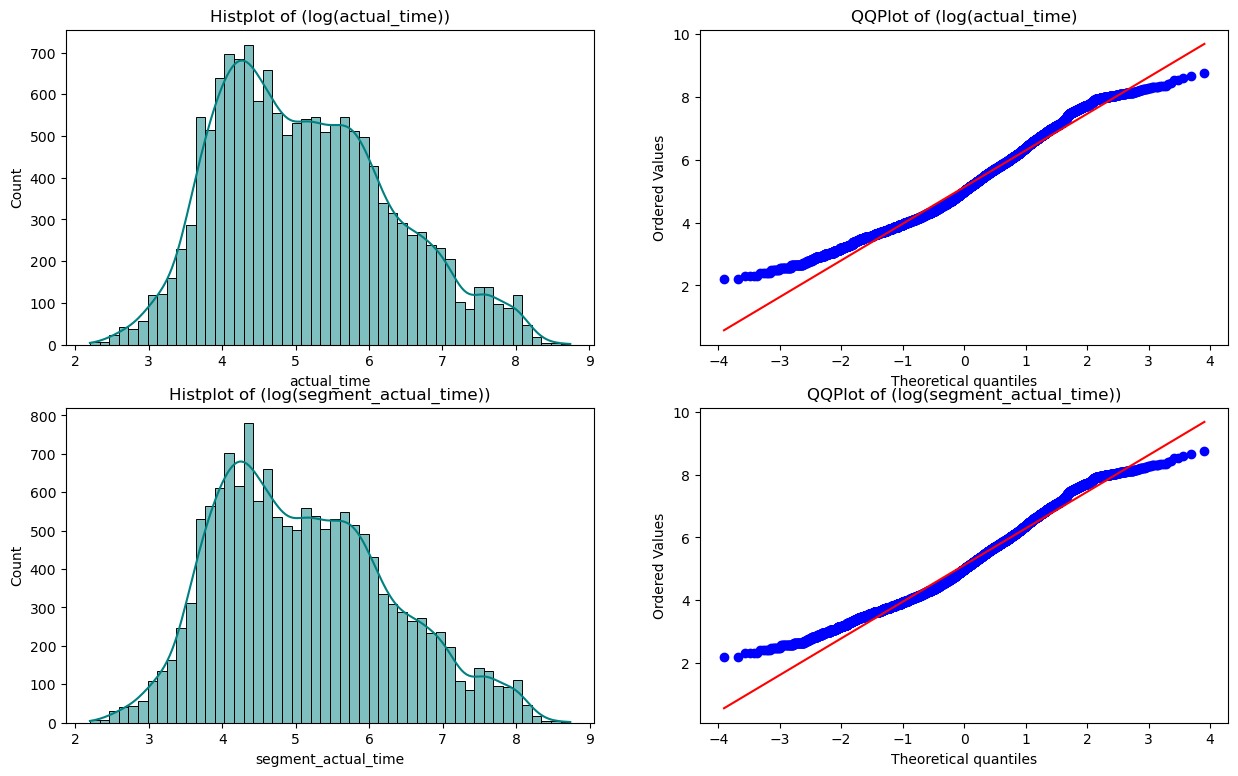

In [54]:
fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(221)
sns.histplot(hypo_3_1_log, bins=50, kde=True,color='teal')
plt.title('Histplot of (log(actual_time))')

ax = fig.add_subplot(222)
stats.probplot(hypo_3_1_log, dist='norm', plot=plt)
plt.title('QQPlot of (log(actual_time)')

ax = fig.add_subplot(223)
sns.histplot(hypo_3_2_log, bins=50, kde=True,color='teal')
plt.title('Histplot of (log(segment_actual_time))')

ax = fig.add_subplot(224)
stats.probplot(hypo_3_2_log, dist='norm', plot=plt)
plt.title('QQPlot of (log(segment_actual_time))')
plt.show()

__Step 3: Defining the significance level__

The significance value, for this hypothesis would be 0.5.

__Step 4: Calculating the p_value__

In [55]:
for i in range(5):
    print(stats.ttest_ind(hypo_3_1_log.sample(5000),hypo_3_2_log.sample(5000)))
    print()

Ttest_indResult(statistic=0.860863390716826, pvalue=0.38933393041109965)

Ttest_indResult(statistic=-0.5345256496353128, pvalue=0.5929897942083289)

Ttest_indResult(statistic=-0.9260362976203891, pvalue=0.3544494688748271)

Ttest_indResult(statistic=-0.2156382805231157, pvalue=0.8292741129274055)

Ttest_indResult(statistic=-1.0580553333748783, pvalue=0.29005577882958655)



__Step 5: Conclusion__

Multiple t-tests have been done, as observed, p_value > the alpha or significance value.


Hence, we fail to reject the null Hypothesis.

## Hypothesis 4
### Statement: HypothesisTesting between osrm distance aggregated value and segment osrm distance aggregated value

__Step 1: Defining the null and Altenate Hypothesis__

H0: actual_time and osrm_time have the same mean.

H1: actual_time and osrm_time does not have the same mean.

__Step 2: Selecting the appropriate test__

T-test is the appropriate test for this hypothesis because the standard deviation of the population of both the column is unknown.

This is a one-tailed test concerning two population means from two independent populations. 

As the population standard deviations are unknown, the two sample independent t-test will be the appropriate test for this problem.

In [56]:
hypo_7 = df.osrm_distance
hypo_8 = df.segment_osrm_distance
hypo_4_1_log = np.log(hypo_7)
hypo_4_2_log = np.log(hypo_8)

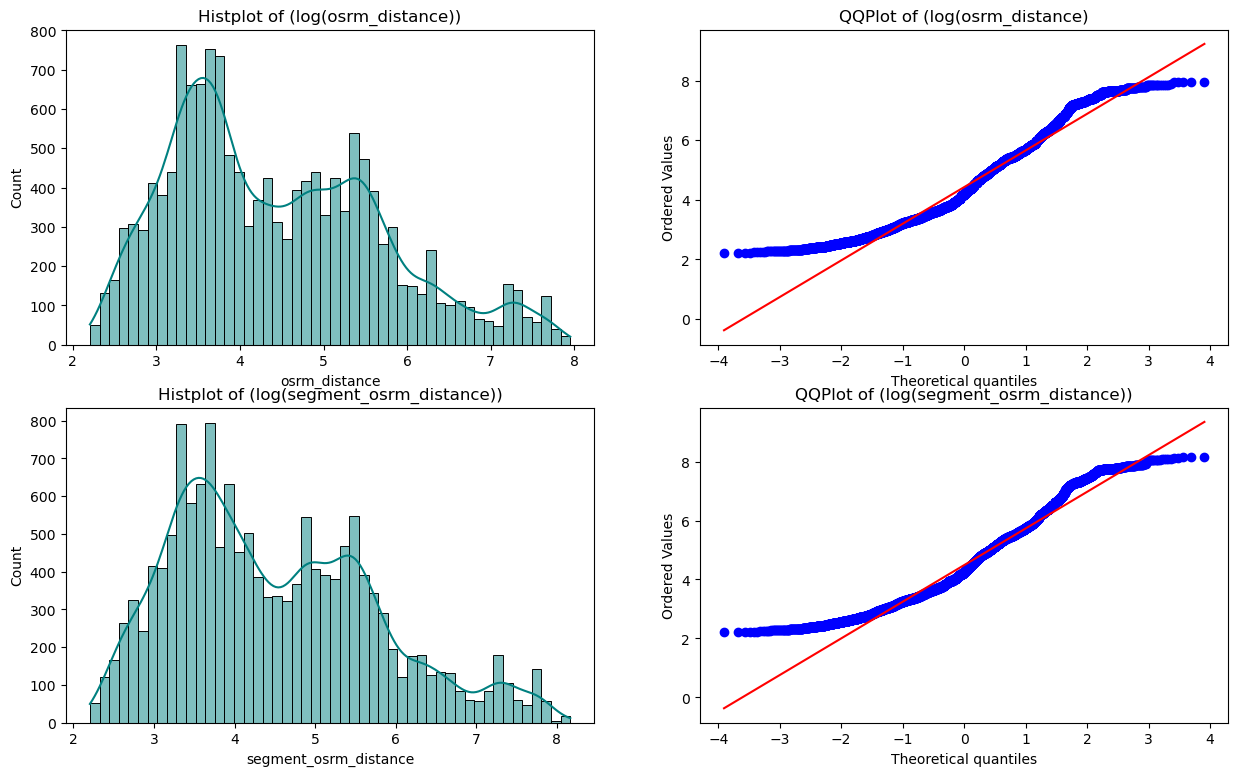

In [57]:
fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(221)
sns.histplot(hypo_4_1_log, bins=50, kde=True,color='teal')
plt.title('Histplot of (log(osrm_distance))')

ax = fig.add_subplot(222)
stats.probplot(hypo_4_1_log, dist='norm', plot=plt)
plt.title('QQPlot of (log(osrm_distance)')

ax = fig.add_subplot(223)
sns.histplot(hypo_4_2_log, bins=50, kde=True,color='teal')
plt.title('Histplot of (log(segment_osrm_distance))')

ax = fig.add_subplot(224)
stats.probplot(hypo_4_2_log, dist='norm', plot=plt)
plt.title('QQPlot of (log(segment_osrm_distance))')
plt.show()

__Step 3: Defining the significance level__

The significance value, for this hypothesis would be 0.5.

__Step 4: Calculating the p_value__

In [58]:
for i in range(7):
    print(stats.ttest_ind(hypo_4_1_log.sample(10000) ,hypo_4_2_log.sample(10000)))
    print()

Ttest_indResult(statistic=-3.8152595720144147, pvalue=0.00013644904905991197)

Ttest_indResult(statistic=-3.3036087985694227, pvalue=0.0009561651628757138)

Ttest_indResult(statistic=-4.529226977377475, pvalue=5.954190442972705e-06)

Ttest_indResult(statistic=-4.2340805357634546, pvalue=2.305133234191693e-05)

Ttest_indResult(statistic=-3.368693785045733, pvalue=0.0007566784490454437)

Ttest_indResult(statistic=-3.5061182930156196, pvalue=0.00045568913832900033)

Ttest_indResult(statistic=-3.073216285663098, pvalue=0.002120498231328932)



__Step 5: Conclusion__

Multiple t-tests have been done, as observed, p_value < the alpha or significance value.


Hence, we reject the null Hypothesis.

## Hypothesis 5
### Statement: HypothesisTesting between osrm time aggregated value and segment osrm time aggregated value

__Step 1: Defining the null and Altenate Hypothesis__

H0: actual_time and osrm_time have the same mean.

H1: actual_time and osrm_time does not have the same mean.

__Step 2: Selecting the appropriate test__

T-test is the appropriate test for this hypothesis because the standard deviation of the population of both the column is unknown.

This is a one-tailed test concerning two population means from two independent populations. 

As the population standard deviations are unknown, the two sample independent t-test will be the

appropriate test for this problem.

In [59]:
 hypo_5_1_log = np.log(df.osrm_time)
hypo_5_2_log = np.log(df.segment_osrm_time)

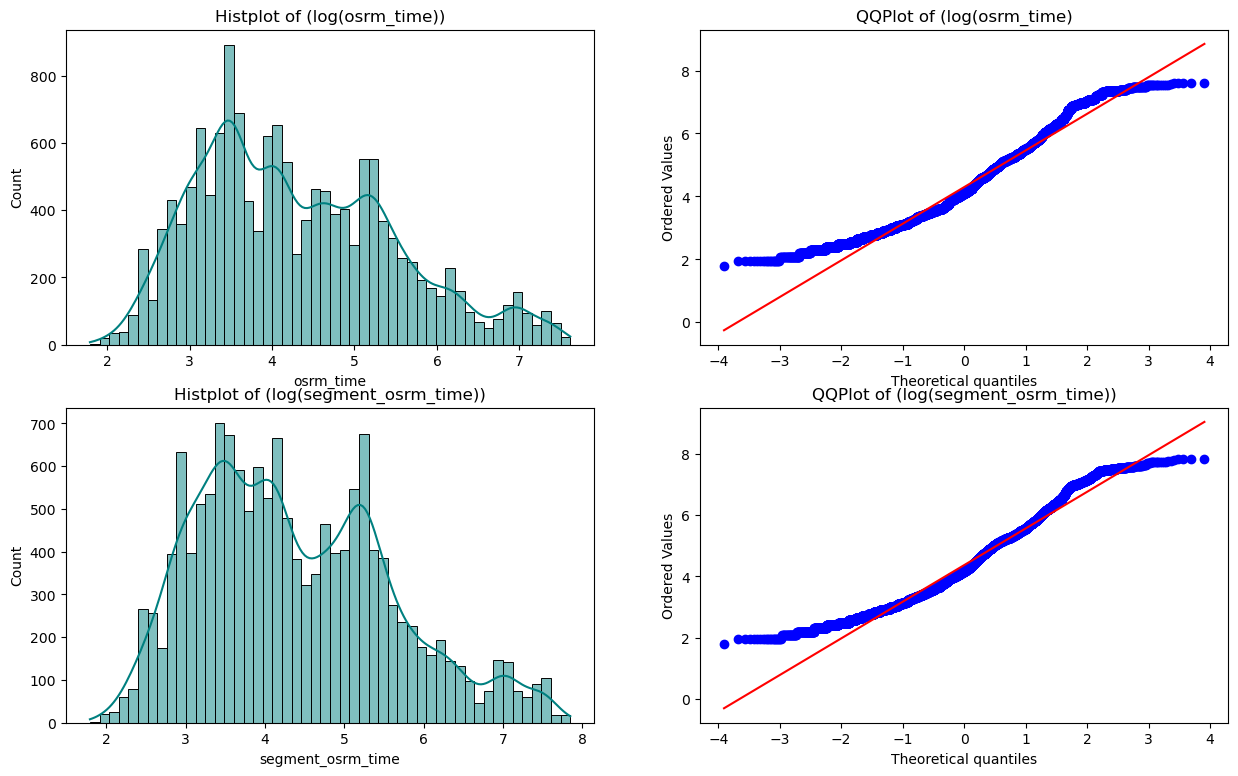

In [60]:
fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(221)
sns.histplot(hypo_5_1_log, bins=50, kde=True,color='teal')
plt.title('Histplot of (log(osrm_time))')

ax = fig.add_subplot(222)
stats.probplot(hypo_5_1_log, dist='norm', plot=plt)
plt.title('QQPlot of (log(osrm_time)')

ax = fig.add_subplot(223)
sns.histplot(hypo_5_2_log, bins=50, kde=True,color='teal')
plt.title('Histplot of (log(segment_osrm_time))')

ax = fig.add_subplot(224)
stats.probplot(hypo_5_2_log, dist='norm', plot=plt)
plt.title('QQPlot of (log(segment_osrm_time))')
plt.show()

__Step 3: Defining the significance level__

The significance value, for this hypothesis would be 0.5.

__Step 4: Calculating the p_value__

In [61]:
for i in range(7):
    print(stats.ttest_ind(hypo_5_1_log.sample(10000) ,hypo_5_2_log.sample(10000)))
    print()

Ttest_indResult(statistic=-3.2843871249324503, pvalue=0.0010238004712606903)

Ttest_indResult(statistic=-5.204181899961802, pvalue=1.9677766909485197e-07)

Ttest_indResult(statistic=-4.731087335513569, pvalue=2.2484612189064717e-06)

Ttest_indResult(statistic=-4.865883863130793, pvalue=1.1481397633008805e-06)

Ttest_indResult(statistic=-5.008557643136253, pvalue=5.530634098878886e-07)

Ttest_indResult(statistic=-4.343734553337351, pvalue=1.4077032147614055e-05)

Ttest_indResult(statistic=-3.5182734079639935, pvalue=0.00043532848057004547)



__Step 5: Conclusion__

Multiple t-tests have been done, as observed, p_value < the alpha or significance value.


Hence, we  reject the null Hypothesis.

# `OUTLIER DETECTION`

In [62]:
number_df = df.select_dtypes('float64')
number_df.shape
number_df.head()

,actual_distance_to_destination,start_scan_to_end_scan,od_duration_in_hrs,actual_time,osrm_time,segment_actual_time,osrm_distance,segment_osrm_distance,segment_osrm_time
0,383.759164,37.650000,37.668497,1562.0,743.0,1548.0,991.3523,1320.4733,1008.0
1,24.644021,3.000000,3.026865,143.0,68.0,141.0,85.1110,84.1894,65.0
2,237.439610,65.550000,65.572709,3347.0,1741.0,3308.0,2372.0852,2545.2678,1941.0
3,17.175274,1.666667,1.674916,59.0,15.0,59.0,19.6800,19.8766,16.0
4,41.317614,11.950000,11.972484,341.0,117.0,340.0,146.7918,146.7919,115.0


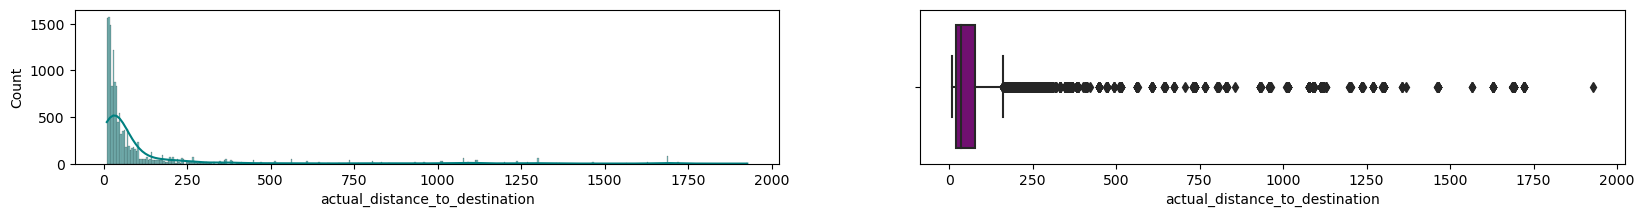

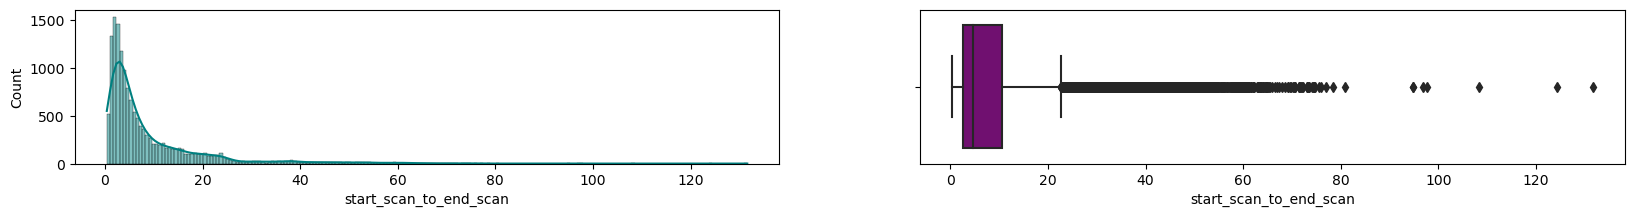

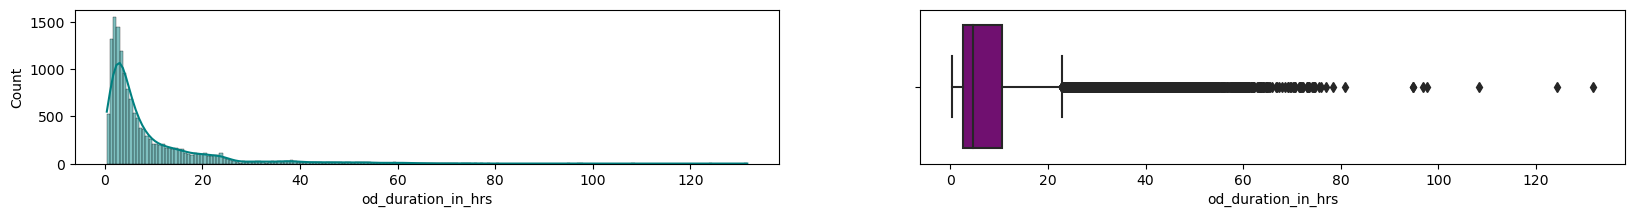

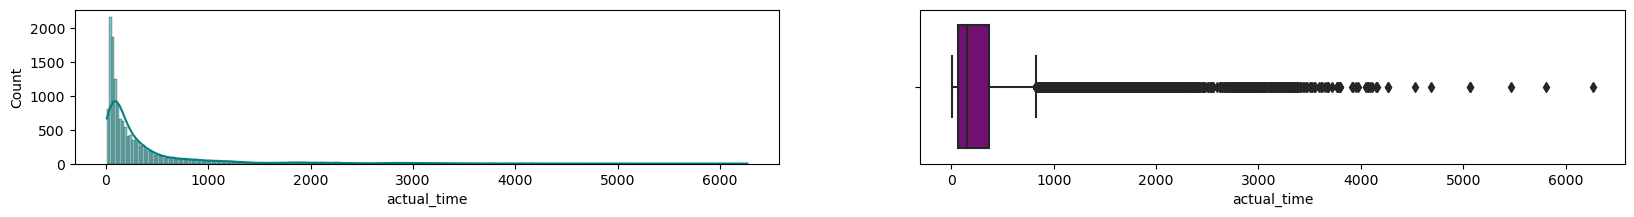

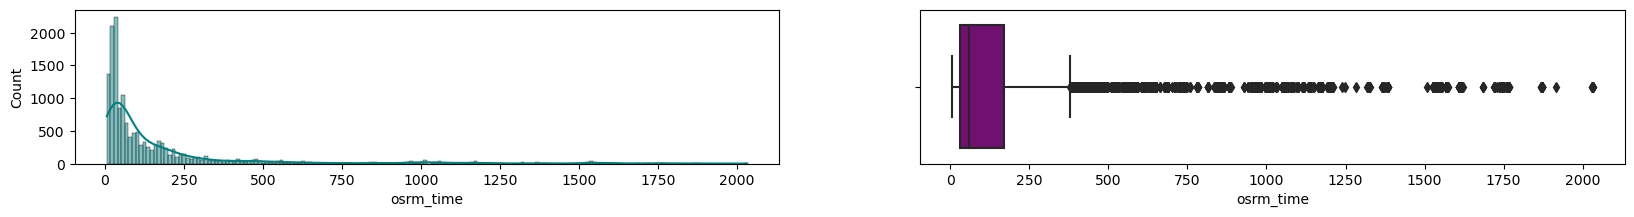

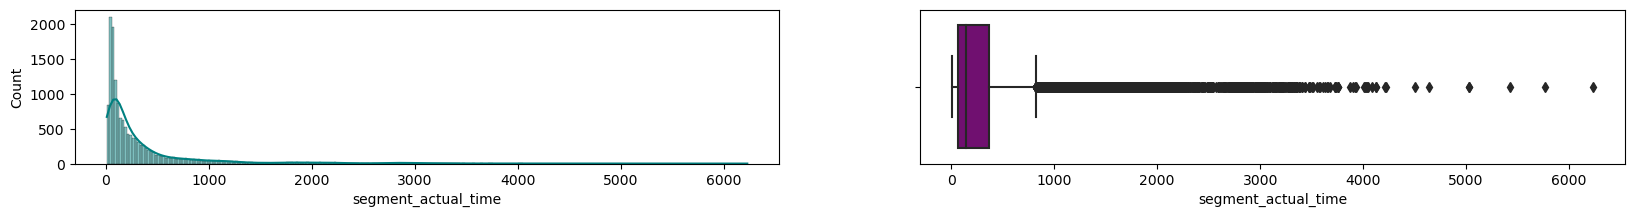

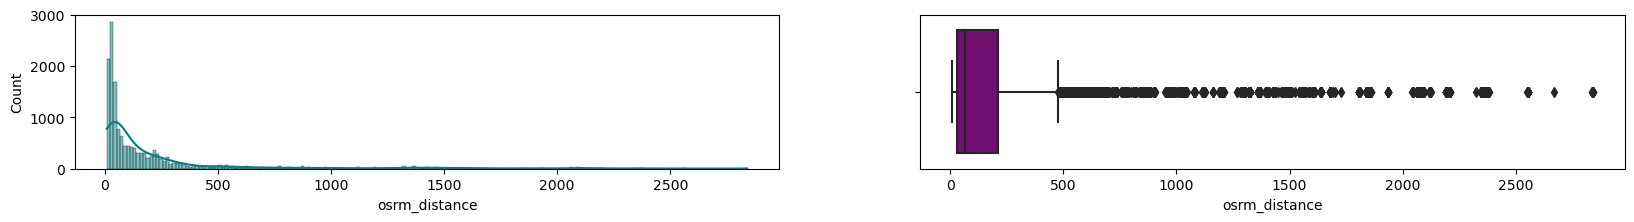

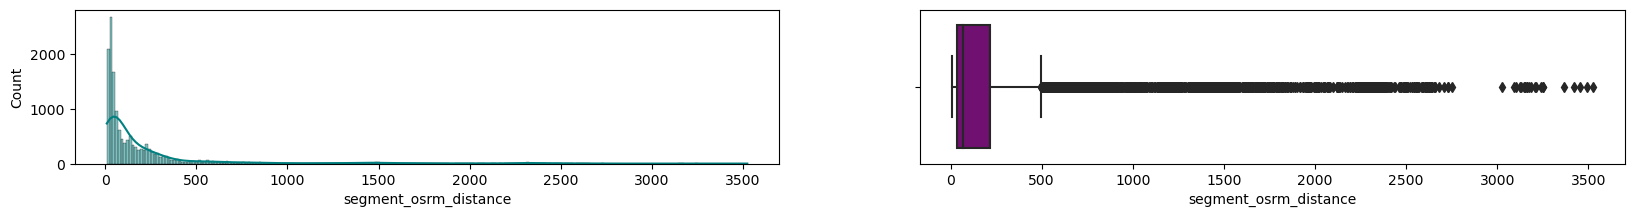

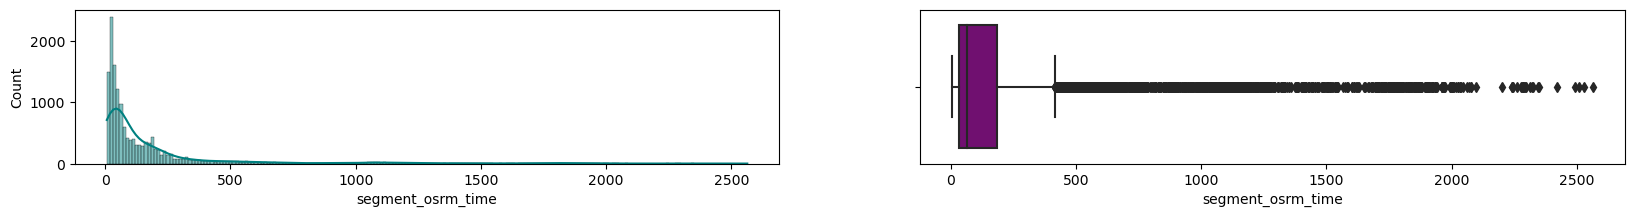

In [63]:
for i in number_df.columns:
    plt.figure(figsize=(20,2))
    plt.subplot(1,2,1)
    sns.histplot(x=number_df[i],color='teal',kde=True)
    plt.subplot(1,2,2)
    sns.boxplot(x=number_df[i],color='purple')
    plt.show()

`Observation:-`
- it can be clearly seen that all the numerical columns in the dataset are following right skewed or poisson distribution which indicates that every column has numerous outliers at the end only.

In [64]:
percentile0 =  number_df[['start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'od_duration_in_hrs']].quantile(0.0)
percentile75 = number_df[['start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'od_duration_in_hrs']].quantile(0.75)
iqr = percentile75 - percentile0
new_df = number_df[number_df < iqr ]
new_df.head()

,actual_distance_to_destination,start_scan_to_end_scan,od_duration_in_hrs,actual_time,osrm_time,segment_actual_time,osrm_distance,segment_osrm_distance,segment_osrm_time
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,24.644021,3.000000,3.026865,143.0,68.0,141.0,85.1110,84.1894,65.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17.175274,1.666667,1.674916,59.0,15.0,59.0,19.6800,19.8766,16.0
4,41.317614,NaN,NaN,341.0,117.0,340.0,146.7918,146.7919,115.0


In [65]:
ad_q1 =  number_df.quantile(0.00)
ad_q3 =  number_df.quantile(0.75)
ad_iqr = ad_q3 - ad_q1
ad_ll = ad_q1 - 1.5*ad_iqr
ad_ul = ad_q3 + 1.5*ad_iqr
new_df = number_df[~((number_df<ad_ll) | (number_df>ad_ul))]


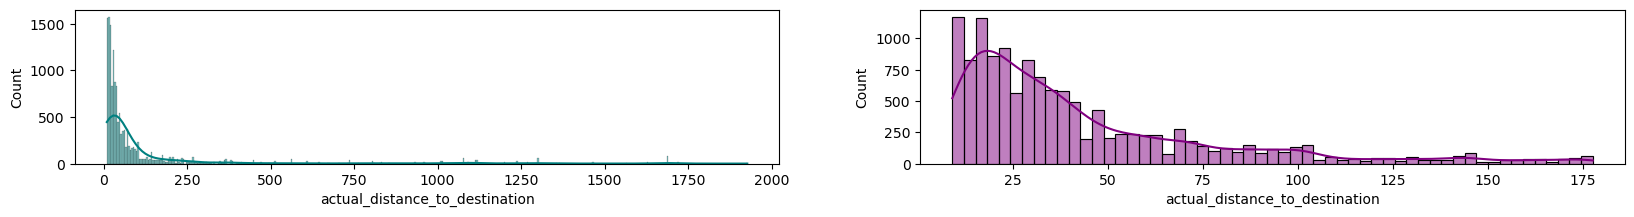

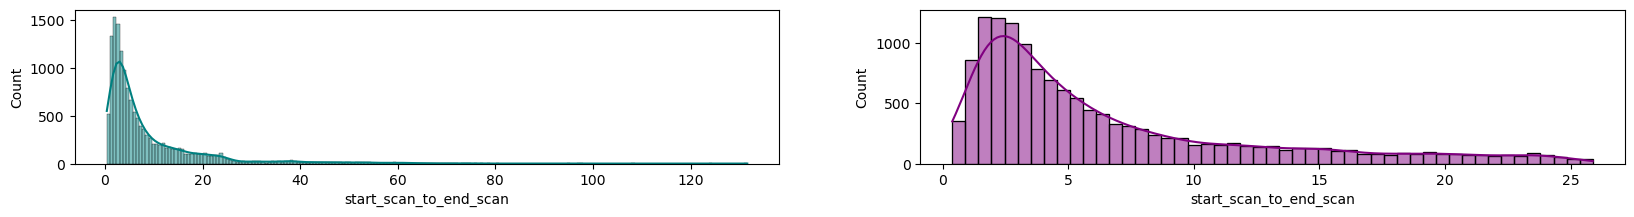

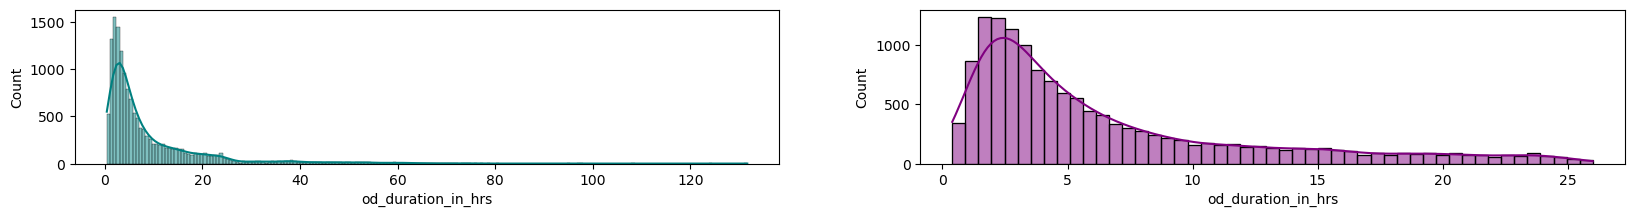

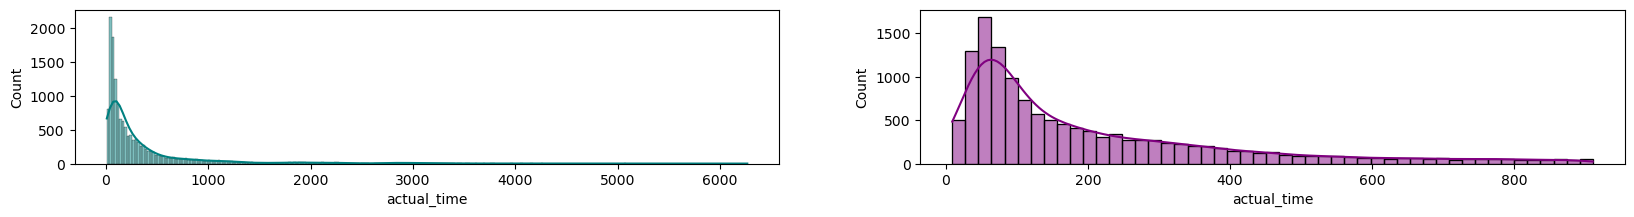

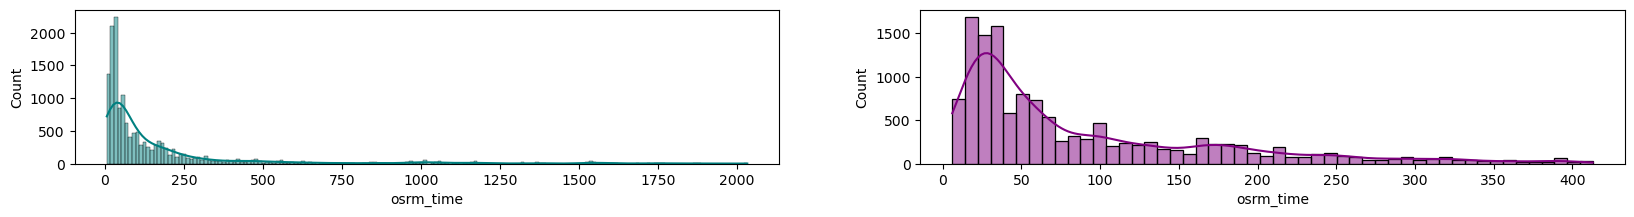

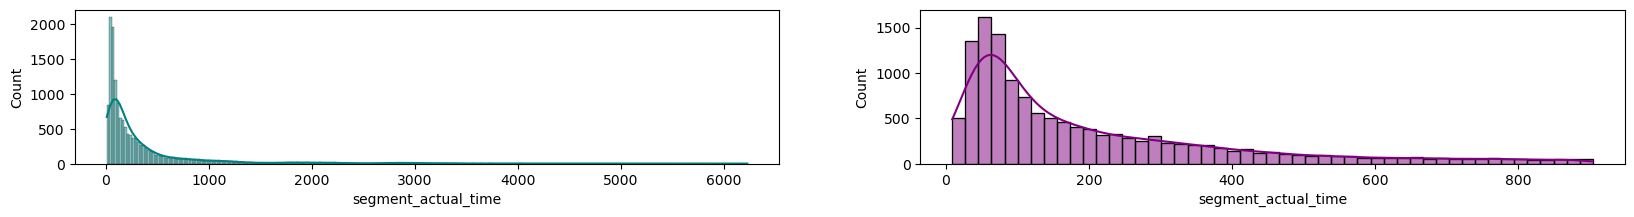

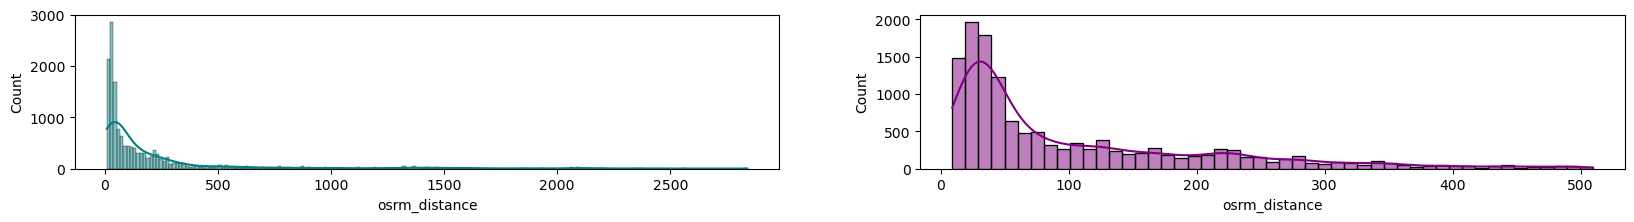

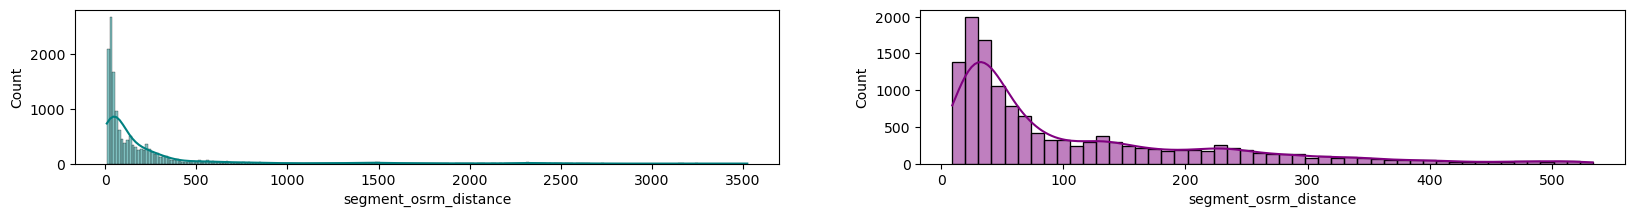

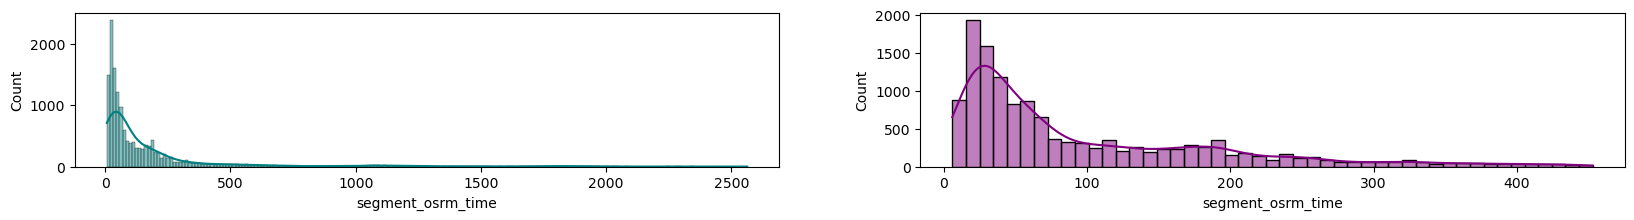

In [66]:
for i in number_df.columns:
    plt.figure(figsize=(20,2))
    plt.subplot(1,2,1)
    sns.histplot(x=number_df[i],color='teal',kde=True)
    plt.subplot(1,2,2)
    sns.histplot(x=new_df[i],color='purple',kde=True)
    plt.show()

# `NON-GRAPHICAL ANALYSIS`

In [67]:
# Top-5 Source States & Their Percentage Contribution
df.source_state.value_counts(normalize=True)[:6]*100

Maharashtra    18.113055
Karnataka      15.053691
Haryana        11.372999
Tamil Nadu      7.327615
Delhi           5.355575
Telangana       5.267779
Name: source_state, dtype: float64

In [68]:
# Top-5 Destiantion States & Their Percentage Contribution
df.destination_state.value_counts(normalize=True)[:6]*100

Maharashtra    17.496117
Karnataka      15.369032
Haryana        11.256668
Tamil Nadu      7.238841
Telangana       5.658721
Gujarat         5.037477
Name: destination_state, dtype: float64

In [69]:
#  Top-5 Source City & Their Percentage Contribution
df.source_city.value_counts(normalize=True)[:6]*100

Gurgaon      6.910981
Bengaluru    6.850240
Bhiwandi     5.473443
Bangalore    5.095498
Delhi        4.184383
Mumbai       3.907674
Name: source_city, dtype: float64

In [70]:
# Top-5 Destiantion City & Their Percentage Contribution
df.destination_city.value_counts(normalize=True)[:6]*100

Bengaluru    7.126949
Mumbai       6.013363
Gurgaon      5.864885
Bangalore    4.359857
Hyderabad    4.251873
Bhiwandi     4.076399
Name: destination_city, dtype: float64

In [71]:
# Top-5 Intrastate Source & Destination States & Their Percentage Contribution
intrastate = df[df['source_state']==df['destination_state']]
intrastate.source_state.value_counts(normalize=True)[:6]*100

Maharashtra    20.440065
Karnataka      17.118342
Tamil Nadu      8.631382
Haryana         7.399541
Telangana       5.564523
Gujarat         5.301164
Name: source_state, dtype: float64

In [72]:
intrastate.destination_state.value_counts(normalize=True)[:6]*100

Maharashtra    20.440065
Karnataka      17.118342
Tamil Nadu      8.631382
Haryana         7.399541
Telangana       5.564523
Gujarat         5.301164
Name: destination_state, dtype: float64

In [73]:
#  Top-5  Source City For Intrastate Packages & Their Percentage Contribution 
intrastate.source_city.value_counts(normalize=True)[:6]*100

Bengaluru    8.520941
Bhiwandi     5.403109
Bangalore    5.029309
Mumbai       4.918868
Hyderabad    3.729505
Pune         3.109337
Name: source_city, dtype: float64

In [74]:
#  Top-4 Destination City For Intrastate Packages & Their Percentage Contribution
intrastate.destination_city.value_counts(normalize=True)[:6]*100

Bengaluru    8.971200
Mumbai       7.569450
Bhiwandi     4.035341
Hyderabad    3.831450
Bangalore    3.627559
Chennai      3.296237
Name: destination_city, dtype: float64

In [75]:
# Interstate
interstate = df[df['source_state']!=df['destination_state']]

In [76]:
# Top-5 Source State For Interstate Packages & Their Percentage Contribution
interstate.source_state.value_counts(normalize=True)[:6]*100

Haryana          26.778656
Delhi            19.202899
Maharashtra       9.090909
Karnataka         7.048748
Uttar Pradesh     5.797101
Punjab            4.578393
Name: source_state, dtype: float64

In [77]:
#  Top-5 Destination State For Interstate Packages & Their Percentage Contribution
interstate.destination_state.value_counts(normalize=True)[:6]*100

Haryana          26.201448
Delhi            15.306122
Karnataka         8.591178
Punjab            6.649111
Uttar Pradesh     6.418697
Maharashtra       6.089533
Name: destination_state, dtype: float64

In [78]:
# Top-5 Source City For Interstate Packages & Their Percentage Contribution
interstate.source_city.value_counts(normalize=True)[:6]*100

Gurgaon       22.422850
Delhi         14.576494
Chandigarh     6.007879
Bhiwandi       5.745240
Bangalore      5.351280
Del            4.563362
Name: source_city, dtype: float64

In [79]:
# Top-5 Source Code
df.source_code.value_counts(normalize=True)[:6]*100

HB     24.550810
H      20.213549
D      14.072165
I      10.184094
IP      4.580265
DPC     3.343152
Name: source_code, dtype: float64

In [80]:
# Top-5 Destination Code
df.destination_code.value_counts(normalize=True)[:6]*100

H      20.353393
HB     18.638178
D      14.934201
I      11.540736
IP      6.114151
DPC     5.589236
Name: destination_code, dtype: float64

In [81]:
number_df.describe().T

,count,mean,std,min,25%,50%,75%,max
actual_distance_to_destination,14817.0,111.336155,247.784236,9.002461,20.420677,35.582875,76.454970,1927.447705
start_scan_to_end_scan,14817.0,8.835778,10.976286,0.383333,2.483333,4.650000,10.583333,131.633333
od_duration_in_hrs,14817.0,8.861857,10.981666,0.391024,2.498843,4.679427,10.636651,131.642533
actual_time,14817.0,357.153945,561.406220,9.000000,67.000000,149.000000,370.000000,6265.000000
osrm_time,14817.0,162.073092,272.304778,6.000000,29.000000,60.000000,169.000000,2032.000000
segment_actual_time,14817.0,353.892286,556.247965,9.000000,66.000000,147.000000,367.000000,6230.000000
osrm_distance,14817.0,205.103917,370.780181,9.072900,30.941800,65.882600,209.300500,2840.081000
segment_osrm_distance,14817.0,223.201161,416.628374,9.072900,32.654500,70.154400,218.802400,3523.632400
segment_osrm_time,14817.0,180.949787,314.542047,6.000000,31.000000,65.000000,185.000000,2564.000000


In [82]:
number_df.columns

Index(['actual_distance_to_destination', 'start_scan_to_end_scan',
       'od_duration_in_hrs', 'actual_time', 'osrm_time', 'segment_actual_time',
       'osrm_distance', 'segment_osrm_distance', 'segment_osrm_time'],
      dtype='object')

In [83]:
df.groupby('route_type')['actual_distance_to_destination', 'start_scan_to_end_scan',
       'od_duration_in_hrs', 'actual_time', 'osrm_time', 'segment_actual_time',
       'osrm_distance', 'segment_osrm_distance', 'segment_osrm_time'].sum()

,actual_distance_to_destination,start_scan_to_end_scan,od_duration_in_hrs,actual_time,osrm_time,segment_actual_time,osrm_distance,segment_osrm_distance,segment_osrm_time
route_type,,,,,,,,,
Carting,2.623224e+05,36566.400000,36706.914427,1120662.0,425614.0,1107845.0,4.732331e+05,5.190451e+05,476935.0
FTL,1.387345e+06,94353.316667,94599.224228,4171288.0,1975823.0,4135777.0,2.565792e+06,2.788126e+06,2204198.0


# `Business Insights:-`
1. Most trips use “Carting” (8K) transportation type as opposed to “FTL” (4K).
2. Bengaluru, Mumbai and Gurgaon are both the top source and destination cities. Bhiwandi,Delhi, Hyderabad, Chennai, Pune and Chandigarh are also some of the top contributors. So, we see that the Southern, Western and Northern corridors have the top contributing cities.
3. The top contributor states (both source and destination) are : Maharashtra is the highest, followed by Karnataka, Haryana, Tamil Nadu and Telengana, Delhi, Gujarat, UP and West Bengal. Again we see Western, Southern and Northern corridors have significant contribution to the traffic.
4. The greatest amount of time was spent in intra-state trips within Maharashtra,Karnataka,Tamil Nadu, Telengana, UP.
5. The greatest amount of distance was covered on inter-state trips in Karnaataka, Maharashtra,Tamil Nadu, Telengana and Andhra.
6. Similarly, the greatest amount of time was spent in intra-city trips within Bangalore, Mumbai,Hyderabad. A significant time is also spent in inter-city trips from Mumbai to Bhiwandi and Guragon to Delhi. These routes also contributed to the greatest amount of distance covered on trips.
7. OSRM seems to be calculating time taken as less than what time it actually takes. This might be because in actual scenario, there might be delays caused by unprecedented traffic or other delays.
8. OSRM seems to be calculating distance as less than what distance is actually covered. So,OSRM is underestimating time and overestimting the distance.
9. Route_type FTL in respect to distance and and time has greater mean as well as median yet FTL route type takes less time as well as distance for delivery.
10. Carting is prefered more in midnight orders.

# `Recommendations:-`
1. Since there is significant dfference between the time and distances calculated by OSRM with actual time and distances, it might make sense to revisit the information which is fed to the routing engine for trip planning. We need to check for discrrepancies with transporters nd to check if the routing engine is configured for optimum performance.
2. We have seen that the Western, Southern and Northern corridors have significant traffic, however, not so much in Eastern, Central and North Eastern corridors. Increasing the presence in these corridors is worth investigating.
3. There is a need to plan resources (specifically during regional festivities) in the states/cities which have highest contribution to traffic.
4. Road network can be taken into consideration to increase the number of FTL deliveries inter state and to connect the states where there is lower traffic.
5. Since “carting” is more popular as method of transport, the number of hubs could be increased in cities and states which have highest contribution to traffic.
6. Carting is preferred more however, FTL performs well in all aspects of time and ditance. So, FTL should be executed more in order to do a faster yet on time deleveries.